## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import StrMethodFormatter
import scipy.stats as stats
import statsmodels.stats
import pandas as pd
import seaborn as sns

import pandas as pdimport 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

## My Functions

In [2]:
def my_spear(x, name_x,  y,name_y, subj):
    
    # calculates Spearman Correlation
    
    # Inputs
    # x , y: dictionaries containing subject name as key and variable to be correlated with as value
    # name_x, name_y: strings of names of x and y variables (will show up in the printed results)

    # subj: list of subject ID's for which we want to calculate correlation, or string 'all' for an overall correlation
    
    # Outputs
    # res_list: a list of results (number of elements = number of subjects)
    #           each res is a 2-element scipy.stats.mstats_basic.SpearmanrResult
    #           res[0] is the r and res[1] is the P-Value

    
    # initiate an empty list for all results
    res_list = []

    if subj == 'all':
        
        # calculate Spearman Correlation all subjects
        overall_res = stats.spearmanr(x, y, axis = 0, nan_policy = 'omit')
                
        # evaluate results by calling evaluate_spear function
        overall_corr_eva , overall_corr_p_val = evaluate_spear(overall_res)
        
        print(f'For All Subjects there is a \033[4m{overall_corr_eva}\033[0m (r = {overall_res[0]:.2}) between {name_x} and {name_y} which has \033[4m{overall_corr_p_val}\033[0m (P_Value = {overall_res[1]:.2})', '\n')
        
        res_list.append((overall_res[0], overall_res[1]))
            
    else:
                
        for i in subj:
        
            # calculate Spearman Correlation for each subject
            res = stats.spearmanr(x[str(i)], y[str(i)], axis = 0, nan_policy = 'omit')

            # evaluate results by calling evaluate_spear function
            corr_eva , corr_p_val = evaluate_spear(res)

            print(f'For Subject {i}: there is a \033[4m{corr_eva}\033[0m (r = {res[0]:.2}) between {name_x} and {name_y} which has \033[4m{corr_p_val}\033[0m (P_Value = {res[1]:.2})', '\n')

            # put the results into a list of tuples 
            res_list.append((res[0], res[1]))
        
    
    return res_list



def evaluate_spear(res):

    # to evaluate strength of correlation and meaningfullness from Spearman Test
    
    # Inputs
    # res: a 2-element scipy.stats.mstats_basic.SpearmanrResult
    #      res[0] is the r and res[1] is the P-Value
    
    # Output
    # corr_eva = a string describing strength of correlation
    # corr_p_val = a string describing strength of meaningfullness
    
    # prints the evaluation satement
    
    # set the evaluation parameters to zero
    corr_eva = 0
    corr_p_val = 0
    
    # conditions of r evaluation
    if res[0] >= 0.00 and res[0] < 0.20:
        corr_eva = 'very weak correlation'
    if res[0] >= 0.20 and res[0] < 0.40:
        corr_eva = 'weak correlatio'
    if res[0] >= 0.40 and res[0] < 0.70:
        corr_eva = 'moderate correlation'
    if res[0] >= 0.70 and res[0] < 0.90:
        corr_eva = 'strong correlation'
    if res[0] >= 0.90 and res[0] <= 1.00:
        corr_eva = 'very strong correlation'
    elif corr_eva == 0:
        print('error in evaluation of coefficient')
        
        
    # conditions of P-Value evaluation
    if res[1] >= 0.10 :
        corr_p_val = 'low -almost no- significance because P-Value is >10%'
    if res[1] >= 0.05 and res[1] < 0.10:
        corr_p_val = 'weak significance because P-Value is 5%-10%'
    if res[1] >= 0.01 and res[1] < 0.05:
        corr_p_val = 'strong significanc because P-Value is 1%-5%'
    if res[1] < 0.01:
        corr_p_val = 'very strong significance because P-Value is <1%'
    elif corr_p_val == 0:
        print('error in evaluation of P value')
    
    return corr_eva , corr_p_val


def evaluate_p(p, statement = True):
        
    # to evaluate meaningfullness of p value (1 or 2 tailed??)
    
    # Inputs
    # p: p-value
    # conf_int: confidence interval ???
    
    # Output
    # p_meaning = a string describing strength of meaningfullness
    # statement = a sentence explaining the results of meaningfullness

    # prints the evaluation satement
    
    # set the evaluation parameters to zero
    p_meaning = 0
    
    if p >= 0.10 :
        p_meaning = 'low -almost no- significance because P-Value is >10%'
    if p >= 0.05 and p < 0.10:
        p_meaning = 'weak significance because P-Value is 5%-10%'
    if p >= 0.01 and p < 0.05:
        p_meaning = 'strong significanc because P-Value is 1%-5%'
    if p < 0.01:
        p = 'very strong significance because P-Value is <1%'
    elif p_meaning == 0:
        print('error in evaluation of P value')
        
    if statement == True:
        print(f'There is \033[4m{p_meaning}\033[0m (P_Value = {p:.2})', '\n')
    
    return p_meaning



### Defining Parameters & Settings (1)

In [3]:
# subject list 
subj_list = [i for i in range(101, 108)]

# subject list but with strings as subject names
subj_list_str = [str(i) for i in range(101, 108)]

# list of questions 
questions = ['itching', 'warmth', 'pricking', 'pain', 'ph_op', 'ph_cl', 'ph_area_op', 'ph_area_cl']

# list of montages 
montages = ['forehead', 'buccinator', 'jaw', 'neck']

# Read the Data

In [4]:
# read the rawdata file and put each sheet into a dataframe, altogether it's a dictionary with 
main_dict = pd.read_excel('rawdata.xlsx', sheet_name = subj_list_str)

# data is a dictionary, keys are subject names (str)
for key in main_dict.keys():
    main_dict[key]

for subj in subj_list_str:
    main_dict[subj].iloc[:,2:] = main_dict[subj].iloc[:,2:].astype(float)

main_dict['101']

,code,question,response-111,unpleasant-111,response-112,unpleasant-112,response-121,unpleasant-121,response-131,unpleasant-131,...,jaw,response-411,unpleasant-411,response-412,unpleasant-412,response-421,unpleasant-421,response-431,unpleasant-431,neck
0,A-1,itching,1.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,3.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0
1,A-2,warmth,1.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,3.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0
2,A-3,pricking,2.000000,0.0,1.0,0.0,2.0,0.0,2.0,0.0,...,5.000000,2.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,7.0
3,A-4,pain,1.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,3.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0
4,B-1,phosphene_score_open,2.000000,0.0,1.0,0.0,4.0,0.0,4.0,0.0,...,7.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0
5,B-2,phosphene_score_closed,5.000000,0.0,1.0,0.0,5.0,0.0,5.0,0.0,...,7.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0
6,B-3,phosphene_area_open,0.134605,NaN,0.0,NaN,1.0,NaN,1.0,NaN,...,0.075832,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
7,B-4,phosphene_area_closed,1.000000,NaN,0.0,NaN,1.0,NaN,1.0,NaN,...,0.075832,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0


In [5]:
# plot sensations for subjects individually

# reference, columns corresponding to frequency and montage

frequencies = dict()

# 1: 5Hz , 2: 10Hz, 3: 30Hz
frequencies[1] = ['response-111', 'response-211', 'response-311', 'response-411']
frequencies[2] = ['response-121', 'response-221', 'response-321', 'response-421']
frequencies[3] = ['response-131', 'response-231', 'response-331', 'response-431']


# emtpy dicts for indicigual sensations

sens_dict_all = dict()
individual_sens_dict = dict()
individual_sens_add = dict()

for key in frequencies:
    
    for idx , montage in enumerate(montages):

        # initiate an empty dataframe with only questions
        individual_sens_dict[montage] = pd.DataFrame(columns = ['question','101' , '102' , '103' , '104' , '105' , '106' , '107'])


        # loop through subjects and add 5Hz scores for each subject as a column
        for subj in subj_list_str:

            # write sensations as row names
            individual_sens_dict[montage].iloc[:,0] = questions

            # extract scores from main dict
            individual_sens_add = pd.Series(main_dict[subj].loc[0:7,frequencies[key][idx]])
            individual_sens_add.loc[0:5] = individual_sens_add.loc[0:5] - 1

            # add the extracted Series to the corresponding column
            individual_sens_dict[montage].loc[:, subj] = individual_sens_add
            individual_sens_add = dict()

    sens_dict_all[key] = individual_sens_dict
    individual_sens_dict = dict()

    
#everything is now in  sens_dict_all , to use it, first give a frequency, then montage
key = 1
sens_dict_all[key]

{'forehead':      question       101       102       103       104       105  106       107
 0     itching  0.000000  0.000000  1.000000  0.000000  0.000000  2.0  1.000000
 1      warmth  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000
 2    pricking  1.000000  0.000000  2.000000  0.000000  0.000000  1.0  1.000000
 3        pain  0.000000  0.000000  0.000000  0.000000  0.000000  1.0  0.000000
 4       ph_op  1.000000  1.000000  1.000000  1.000000  1.000000  1.0  2.000000
 5       ph_cl  4.000000  1.000000  2.000000  1.000000  2.000000  1.0  3.000000
 6  ph_area_op  0.134605  0.315612  0.757192  0.260606  0.418794  1.0  0.664342
 7  ph_area_cl  1.000000  0.366520  0.106736  0.252380  0.259359  1.0  0.818920,
 'buccinator':      question       101       102       103       104       105       106  \
 0     itching  0.000000  1.000000  0.000000  0.000000  1.000000  0.000000   
 1      warmth  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 2    pricking  1.0

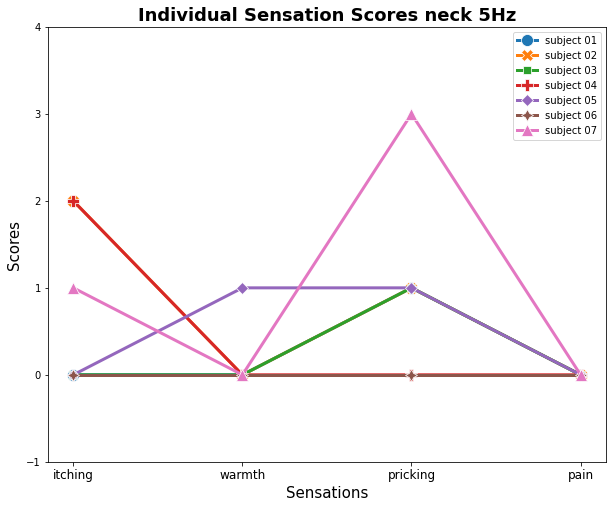

In [6]:
# temp, trying with lineplot
freq = 1
questions_sens = questions[0:4]

# plot
fig, ax = plt.subplots(figsize = (10 , 8))
plt.ylim(bottom = -1)
plt.ylim(top = 4)
plt.title("Individual Sensation Scores " + montage + " 5Hz", fontsize=18, fontweight='bold')

sns.lineplot(data = sens_dict_all[freq][montage][0:4], markers = True, markersize=12, dashes = False, linewidth = 3)

ax.set_xticks([0,1,2,3], labels = questions_sens, fontsize=12)
ax.set_yticks([-1,  0 , 1, 2, 3, 4], fontsize=20) 
ax.set_xlabel("Sensations", fontsize=15)
ax.set_ylabel("Scores", fontsize=15)
ax.legend (['subject 01', 'subject 02', 'subject 03', 'subject 04', 'subject 05', 'subject 06', 'subject 07'], loc="upper right")

plt.show()

    #fig.savefig("ind_sens_5Hz.png")

In [7]:
df_all = pd.DataFrame(columns = ['subj_ID', 'montage', 'freq', 'sensation', 'score'])

#freq = 5
#sensations = ['itching', 'warmth', 'pricking', 'pain']

for freq in [1,2,3]:
    for mont_idx , montage in enumerate(montages):
        for subj in subj_list_str:
            for sens_idx, sens in enumerate(questions):
                mylist = {'subj_ID': subj, 'montage': float(mont_idx) + 1, 'freq': freq, 'sensation': sens , 'score': sens_dict_all[freq][montage][subj][sens_idx]}

                mylist['score'] = mylist['score'].astype(float)
                
                df_all = df_all.append(mylist, ignore_index = True)

#groups = df_all.groupby(['montage'])
#groups.size()

# a clean and nice df for the whole sensation data:)
# to access a specific frequency:
# df_all[df_all['freq'] == 5]


df_all

,subj_ID,montage,freq,sensation,score
0,101,1.0,1,itching,0.000000
1,101,1.0,1,warmth,0.000000
2,101,1.0,1,pricking,1.000000
3,101,1.0,1,pain,0.000000
4,101,1.0,1,ph_op,1.000000
...,...,...,...,...,...
667,107,4.0,3,pain,0.000000
668,107,4.0,3,ph_op,1.000000
669,107,4.0,3,ph_cl,0.000000
670,107,4.0,3,ph_area_op,0.051579


In [8]:
# temp, trying with lmplot

#g = sns.lmplot(data=df_all, x='montage', y='score', hue = 'sensation',  palette="Set1", height = 9, x_jitter=.05)
#
##g.set_xticks([1,2,3,4])
#plt.xticks([1,2,3,4], montages, rotation = 45);
#
#g = (g.set_axis_labels("Montage", "Scores", fontsize=14, fontweight='bold')
#
#      .set(xlim=(0.5, 4.5) , ylim=(-1, 4))
#
#      .fig.subplots_adjust(wspace=.02))
#
#plt.savefig('seaborn_all.svg')

## PLOT: effect of montage on skin sensations

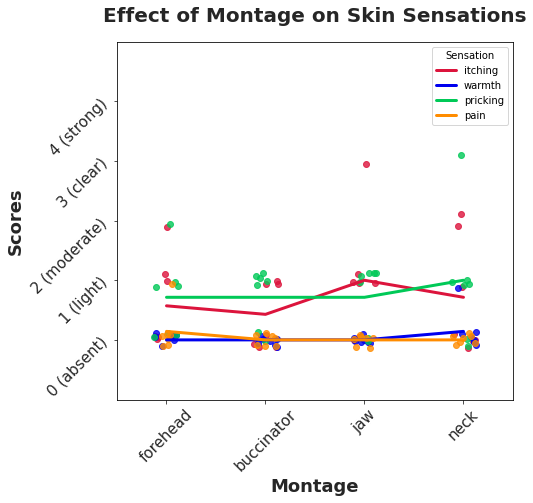

In [9]:
# choose frequency
freq = 1

#slice the df to include only skin sensations
df_all_skin = dict()
df_all_skin =df_all.loc[(df_all['sensation'] == 'itching') | (df_all['sensation'] == 'warmth') | (df_all['sensation'] == 'pricking') | (df_all['sensation'] == 'pain'), :]

df_all_skin_itch =df_all.loc[(df_all['sensation'] == 'itching'), :]
df_all_skin_warmth =df_all.loc[(df_all['sensation'] == 'warmth'), :]
df_all_skin_prick =df_all.loc[(df_all['sensation'] == 'pricking'), :]
df_all_skin_pain =df_all.loc[(df_all['sensation'] == 'pain'), :]

my_jitter = 0.13

my_custom_color_set = ["#DC143C", "#0000EE", "#00C957", "#FF8C00"]

sns.set_palette(my_custom_color_set)

    # set a general theme for seaborn
with sns.axes_style("ticks", {'axes.linewidth': 2, 'axes.edgecolor':'black'}):
    #white, dark, whitegrid, darkgrid, ticks
    
# the line plot
    g = sns.relplot(x='montage', y='score', kind="line", ci=None, hue = 'sensation',
                    height = 7, aspect = 10/7, 
                    data=df_all_skin[df_all_skin['freq'] == freq],
                    facet_kws=dict(despine=False),
                   legend = False,
                   linewidth = 3);
# add a scatter plot
#g.map_dataframe(sns.scatterplot, 'montage', 'score', color='g', hue = 'sensation', x_jitter = 0.5, s=100);

    sns.regplot(x='montage', y='score', data=df_all_skin_itch[df_all_skin_itch['freq'] == freq], x_jitter = my_jitter, y_jitter = my_jitter, color = my_custom_color_set[0], fit_reg = False, scatter = True, marker = 'o');
    sns.regplot(x='montage', y='score', data=df_all_skin_warmth[df_all_skin_warmth['freq'] == freq], x_jitter = my_jitter, y_jitter = my_jitter, color = my_custom_color_set[1], fit_reg = False, scatter = True, marker = 'o');
    sns.regplot(x='montage', y='score', data=df_all_skin_prick[df_all_skin_prick['freq'] == freq], x_jitter = my_jitter, y_jitter = my_jitter, color = my_custom_color_set[2], fit_reg = False, scatter = True, marker = 'o');
    sns.regplot(x='montage', y='score', data=df_all_skin_pain[df_all_skin_pain['freq'] == freq], x_jitter = my_jitter, y_jitter = my_jitter, color = my_custom_color_set[3], fit_reg = False, scatter = True, marker = 'o');

    
# axis labels
g.set_axis_labels("Montage", "Scores", fontsize=18, fontweight='bold')


# x & y lim
g.set(xlim=(0.5, 4.5) , ylim=(-1, 5))

# adjusting margins
g.fig.subplots_adjust(left=0.3, bottom=0.19, top=0.9, right=0.85, wspace=0.5, hspace=0.5)

# xticks (plt)
plt.xticks([1,2,3,4], montages, size = 15, rotation = 45);  
plt.yticks([0, 1, 2, 3, 4], ['0 (absent)', '1 (light)', '2 (moderate)', '3 (clear)', '4 (strong)'], size = 15, rotation = 45);  

# add legend
ax =g.axes[0][0]

for i, line in enumerate(ax.lines):
    line.set_label(i)

leg = ax.legend(questions[0:4])
leg.set_title("Sensation" )
leg.set_bbox_to_anchor(None) 

# title
plt.title('Effect of Montage on Skin Sensations', fontsize=20, fontweight='bold', pad=20);

#plot_margin = 0.25


#plt.savefig('seaborn_montage_skin_5Hz.png', 
#            dpi=300, 
#            format='png'
#            )
#plt.savefig('seaborn_montage_skin_5Hz.svg', 
#            dpi=300, 
#            format='svg'
#            )
#

## PLOT: effect of frequency on skin sensations

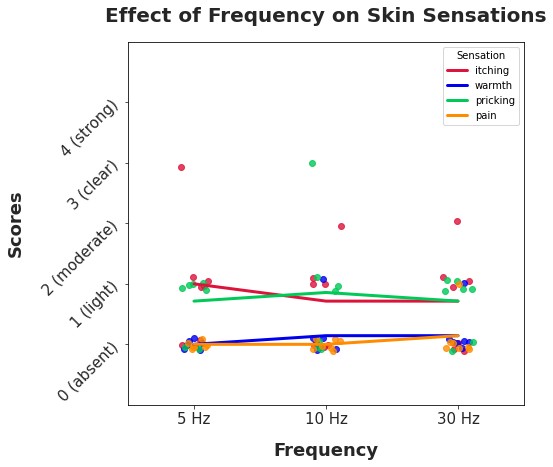

In [10]:
# choose a montage

# montage 1: forehead, 2: bucc, 3: jaw, 4: neck
montage = 3

#slice the df to include only skin sensations
df_all_skin = dict()
df_all_skin =df_all.loc[(df_all['sensation'] == 'itching') | (df_all['sensation'] == 'warmth') | (df_all['sensation'] == 'pricking') | (df_all['sensation'] == 'pain'), :]

df_all_skin_itch =df_all.loc[(df_all['sensation'] == 'itching'), :]
df_all_skin_warmth =df_all.loc[(df_all['sensation'] == 'warmth'), :]
df_all_skin_prick =df_all.loc[(df_all['sensation'] == 'pricking'), :]
df_all_skin_pain =df_all.loc[(df_all['sensation'] == 'pain'), :]

my_jitter = 0.12

my_custom_color_set = ["#DC143C", "#0000EE", "#00C957", "#FF8C00"]

sns.set_palette(my_custom_color_set)
# set a general theme for seaborn
with sns.axes_style("ticks", {'axes.linewidth': 2, 'axes.edgecolor':'black'}):

# the line plot
    g = sns.relplot(x='freq', y='score', kind="line", ci=None, hue = 'sensation', 
                    height=7, aspect=10/7, 
                    data=df_all_skin[df_all_skin['montage'] == montage], 
                    facet_kws=dict(despine=False),
                    legend = False,
                    linewidth = 3);
# add a scatter plot
#g.map_dataframe(sns.scatterplot, 'freq', 'score', color='g', hue = 'sensation', x_jitter = 0.5, s=100);

    sns.regplot(x='freq', y='score', data=df_all_skin_itch[df_all_skin_itch['montage'] == montage], x_jitter = my_jitter, y_jitter = my_jitter, color = my_custom_color_set[0], fit_reg = False, scatter = True, marker = 'o');
    sns.regplot(x='freq', y='score', data=df_all_skin_warmth[df_all_skin_warmth['montage'] == montage], x_jitter = my_jitter, y_jitter = my_jitter, color = my_custom_color_set[1], fit_reg = False, scatter = True, marker = 'o');
    sns.regplot(x='freq', y='score', data=df_all_skin_prick[df_all_skin_prick['montage'] == montage], x_jitter = my_jitter, y_jitter = my_jitter, color = my_custom_color_set[2], fit_reg = False, scatter = True, marker = 'o');
    sns.regplot(x='freq', y='score', data=df_all_skin_pain[df_all_skin_pain['montage'] == montage], x_jitter = my_jitter, y_jitter = my_jitter, color = my_custom_color_set[3], fit_reg = False, scatter = True, marker = 'o');

# axis labels
g.set_axis_labels("Frequency", "Scores", fontsize=18, fontweight='bold', labelpad = 15)

# x & y lim
g.set(xlim=(0.5, 3.5) , ylim=(-1, 5))

# I have no idea what this does!
g.fig.subplots_adjust(wspace=0.02)

# xticks (plt)
plt.xticks([1, 2, 3], ['5 Hz', '10 Hz', '30 Hz'], size = 15);  
plt.yticks([0, 1, 2, 3, 4], ['0 (absent)', '1 (light)', '2 (moderate)', '3 (clear)', '4 (strong)'], size = 15, rotation = 45);  

# add legend
ax =g.axes[0][0]

for i, line in enumerate(ax.lines):
    line.set_label(i)

leg = ax.legend(questions[0:4])
leg.set_title("Sensation" )
leg.set_bbox_to_anchor(None) 

# title
plt.title('Effect of Frequency on Skin Sensations', fontsize=20, fontweight='bold',pad=20);

# adjusting margins
g.fig.subplots_adjust(left=0.3, bottom=0.18, top=0.9, right=0.85, wspace=0.5, hspace=0.5)


#plot_margin = 0.25
#
#plt.savefig('seaborn_freq_skin_jaw.png', 
#            dpi=300, 
#            format='png')
#plt.savefig('seaborn_freq_skin_jaw.svg', 
#            dpi=300, 
#            format='svg')

In [11]:
#sns.lmplot(data=df_all, x='montage', y='score', hue = 'subj_ID',  palette="Set1", col = 'sensation')b

In [12]:
#sns.catplot(data=df_all, kind="swarm", x="montage", y="score", hue="subj_ID")

## PLOT: effect of montage on phosphene

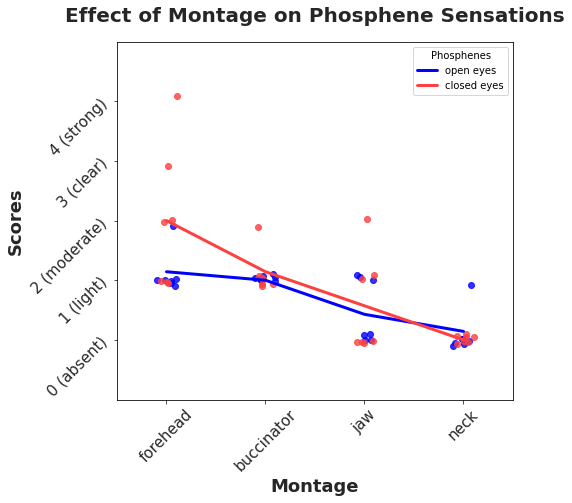

In [13]:
# choose frequency
freq = 1

#slice the df to include only phosphene sens
df_all_ph = dict()
df_all_ph =df_all.loc[(df_all['sensation'] == 'ph_op') | (df_all['sensation'] == 'ph_cl'), :]

df_all_ph_op =df_all.loc[(df_all['sensation'] == 'ph_op'), :]
df_all_ph_cl =df_all.loc[(df_all['sensation'] == 'ph_cl'), :]


my_jitter = 0.11

my_custom_color_set_ph = ["#0000FF", "#FF4040"]

sns.set_palette(my_custom_color_set_ph)

# set a general theme for seaborn
with sns.axes_style("ticks", {'axes.linewidth': 2, 'axes.edgecolor':'black'}):
    #white, dark, whitegrid, darkgrid, ticks
    
# the line plot
    g = sns.relplot(x='montage', y='score', kind="line", ci=None, hue = 'sensation',
                    height = 7, aspect = 10/7, 
                    data=df_all_ph[df_all_ph['freq'] == freq], 
                    facet_kws=dict(despine=False),
                    legend = False,
                    linewidth = 3);
# add a scatter plot
#g.map_dataframe(sns.scatterplot, 'montage', 'score', color='g', hue = 'sensation', x_jitter = 1000, s=100);

    sns.regplot(x='montage', y='score', data=df_all_ph_op[df_all_ph_op['freq'] == freq], x_jitter = my_jitter, y_jitter = my_jitter, color = my_custom_color_set_ph[0], fit_reg = False, scatter = True, marker = 'o');
    sns.regplot(x='montage', y='score', data=df_all_ph_cl[df_all_ph_cl['freq'] == freq], x_jitter = my_jitter, y_jitter = my_jitter, color = my_custom_color_set_ph[1], fit_reg = False, scatter = True, marker = 'o');

# axis labels
g.set_axis_labels("Montage", "Scores", fontsize=18, fontweight='bold')

# x & y lim
g.set(xlim=(0.5, 4.5) , ylim=(-1, 5))

# adjusting margins
g.fig.subplots_adjust(left=0.3, bottom=0.19, top=0.9, right=0.85, wspace=0.5, hspace=0.5)

# xticks (plt)
plt.xticks([1,2,3,4], montages, size = 15, rotation = 45);  
plt.yticks([0, 1, 2, 3, 4], ['0 (absent)', '1 (light)', '2 (moderate)', '3 (clear)', '4 (strong)'], size = 15, rotation = 45);  

# add legend
ax =g.axes[0][0]

for i, line in enumerate(ax.lines):
    line.set_label(i)

leg = ax.legend(['open eyes', 'closed eyes'])
leg.set_title("Phosphenes" )
leg.set_bbox_to_anchor(None) 


# title
plt.title('Effect of Montage on Phosphene Sensations', fontsize=20, fontweight='bold',pad=20);


plot_margin = 0.25

plt.savefig('seaborn_montage_ph_5Hz.png', 
            dpi=300, 
            format='png' 
            )
plt.savefig('seaborn_montage_ph_5Hz.svg', 
            dpi=300, 
            format='svg'
            )

## PLOT: effect of frequency on phosphene

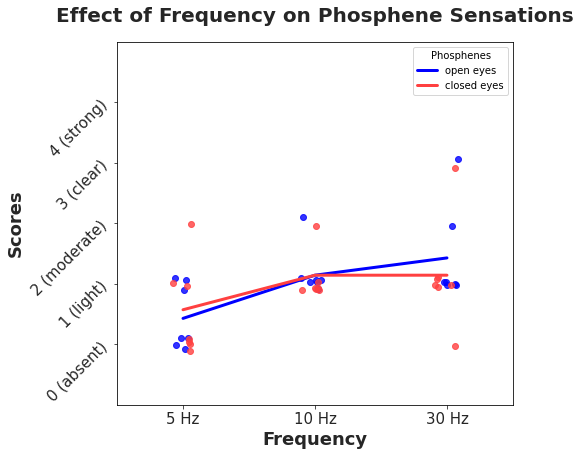

In [14]:
# choose frequency

# montage 1: forehead, 2: bucc, 3: jaw, 4: neck
montage = 3

my_jitter = 0.11

my_custom_color_set_ph = ["#0000FF", "#FF4040"]

sns.set_palette(my_custom_color_set_ph)

#slice the df to include only phosphene sens
df_all_ph = dict()
df_all_ph =df_all.loc[(df_all['sensation'] == 'ph_op') | (df_all['sensation'] == 'ph_cl'), :]

df_all_ph_op =df_all.loc[(df_all['sensation'] == 'ph_op'), :]
df_all_ph_cl =df_all.loc[(df_all['sensation'] == 'ph_cl'), :]


# set a general theme for seaborn
with sns.axes_style("ticks", {'axes.linewidth': 2, 'axes.edgecolor':'black'}):
    #white, dark, whitegrid, darkgrid, ticks
    
# the line plot
    g = sns.relplot(x='freq', y='score', kind="line", ci=None, hue = 'sensation', 
                    height = 7, aspect = 10/7, 
                    data=df_all_ph[df_all_ph['montage'] == montage], 
                    facet_kws=dict(despine=False),
                    legend = False,
                    linewidth = 3);
# add a scatter plot
#g.map_dataframe(sns.scatterplot, 'montage', 'score', color='g', hue = 'sensation', x_jitter = 1000, s=100);
#sns.scatterplot(x='montage', y='score', data=df_all_ph[df_all_ph['freq'] == freq], color='g', hue = 'sensation', x_jitter = 20, s=50);
    sns.regplot(x='freq', y='score', data=df_all_ph_op[df_all_ph_op['montage'] == montage], x_jitter = my_jitter, y_jitter = my_jitter, color = my_custom_color_set_ph[0], fit_reg = False, scatter = True, marker = 'o');
    sns.regplot(x='freq', y='score', data=df_all_ph_cl[df_all_ph_cl['montage'] == montage], x_jitter = my_jitter, y_jitter = my_jitter, color = my_custom_color_set_ph[1], fit_reg = False, scatter = True, marker = 'o');

# axis labels
g.set_axis_labels("Frequency", "Scores", fontsize=18, fontweight='bold')

# x & y lim
g.set(xlim=(0.5, 3.5) , ylim=(-1, 5))

# adjusting margins
g.fig.subplots_adjust(left=0.3, bottom=0.18, top=0.9, right=0.85, wspace=0.5, hspace=0.5)

# xticks (plt)

plt.xticks([1, 2, 3], ['5 Hz', '10 Hz', '30 Hz'], size = 15);  
plt.yticks([0, 1, 2, 3, 4], ['0 (absent)', '1 (light)', '2 (moderate)', '3 (clear)', '4 (strong)'], size = 15, rotation = 45);  

# add legend
ax =g.axes[0][0]

for i, line in enumerate(ax.lines):
    line.set_label(i)

leg = ax.legend(['open eyes', 'closed eyes'])
leg.set_title("Phosphenes" )
leg.set_bbox_to_anchor(None) 

# title
plt.title('Effect of Frequency on Phosphene Sensations', fontsize=20, fontweight='bold',pad=20);


plot_margin = 0.25

plt.savefig('seaborn_freq_ph.png', 
            dpi=300, 
            format='png' 
            )
plt.savefig('seaborn_freq_ph.svg', 
            dpi=300, 
            format='svg'
            )

## PLOT: effect of montage on phosphene Area

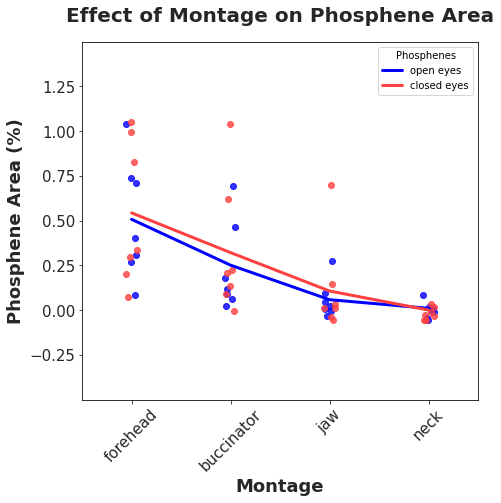

In [15]:
# choose frequency
freq = 1

my_jitter = 0.06

my_custom_color_set_ph = ["#0000FF", "#FF4040"]

sns.set_palette(my_custom_color_set_ph)


#slice the df to include only phosphene sens
df_all_ph_area = dict()
df_all_ph_area =df_all.loc[(df_all['sensation'] == 'ph_area_op') | (df_all['sensation'] == 'ph_area_cl'), :]

df_all_ph_area_op =df_all.loc[(df_all['sensation'] == 'ph_area_op'), :]
df_all_ph_area_cl =df_all.loc[(df_all['sensation'] == 'ph_area_cl'), :]


# set a general theme for seaborn
with sns.axes_style("ticks", {'axes.linewidth': 2, 'axes.edgecolor':'black'}):
    #white, dark, whitegrid, darkgrid, ticks
    
# the line plot
    g = sns.relplot(x='montage', y='score', kind="line", ci=None, hue = 'sensation', 
                    height = 7, aspect = 10/7, 
                    data=df_all_ph_area[df_all_ph_area['freq'] == freq], 
                    facet_kws=dict(despine=False),
                    legend = False,
                    linewidth = 3);

    # add a scatter plot
    sns.regplot(x='montage', y='score', data=df_all_ph_area_op[df_all_ph_area_op['freq'] == freq], 
                x_jitter = my_jitter, y_jitter = my_jitter, 
                color = my_custom_color_set_ph[0], 
                fit_reg = False, scatter = True, marker = 'o');
    sns.regplot(x='montage', y='score', data=df_all_ph_area_cl[df_all_ph_area_cl['freq'] == freq], 
                x_jitter = my_jitter, y_jitter = my_jitter, 
                color = my_custom_color_set_ph[1], 
                fit_reg = False, scatter = True, marker = 'o');

# axis labels
g.set_axis_labels("Montage", "Phosphene Area (%)", fontsize=18, fontweight='bold')

# x & y lim
g.set(xlim=(0.5, 4.5) , ylim=(-.5, 1.5))

# adjusting margins
g.fig.subplots_adjust(left=0.3, bottom=0.19, top=0.9, right=0.85, wspace=0.5, hspace=0.5)

# xticks (plt)
plt.xticks([1,2,3,4], montages, size = 15, rotation = 45);  
plt.yticks(np.arange(-0.25 , 1.5, 0.25), size = 15);  

# add legend
ax =g.axes[0][0]

for i, line in enumerate(ax.lines):
    line.set_label(i)

leg = ax.legend(['open eyes', 'closed eyes'])
leg.set_title("Phosphenes" )
leg.set_bbox_to_anchor(None) 


# title
plt.title('Effect of Montage on Phosphene Area', fontsize=20, fontweight='bold',pad=20);


plot_margin = 0.25

plt.savefig('seaborn_montage_ph_area_5Hz.png', 
            dpi=300, 
            format='png' 
            )
plt.savefig('seaborn_montage_ph_area_5Hz.svg', 
            dpi=300, 
            format='svg'
            )

## PLOT: effect of frequency on phosphene Area

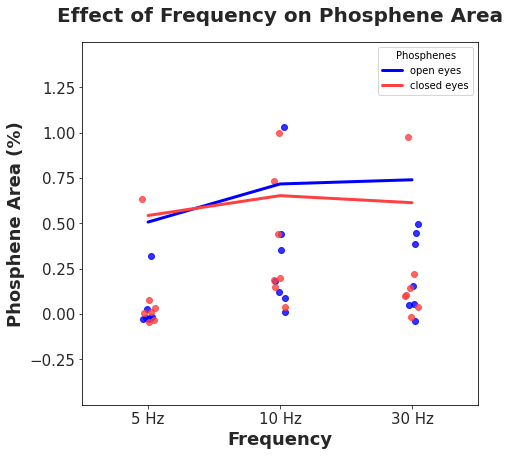

In [16]:
# montage 1: forehead, 2: bucc, 3: jaw, 4: neck
montage = 3

my_jitter = 0.05

my_custom_color_set_ph = ["#0000FF", "#FF4040"]

sns.set_palette(my_custom_color_set_ph)


#slice the df to include only phosphene sens
df_all_ph_area = dict()
df_all_ph_area =df_all.loc[(df_all['sensation'] == 'ph_area_op') | (df_all['sensation'] == 'ph_area_cl'), :]

df_all_ph_area_op =df_all.loc[(df_all['sensation'] == 'ph_area_op'), :]
df_all_ph_area_cl =df_all.loc[(df_all['sensation'] == 'ph_area_cl'), :]


# set a general theme for seaborn
with sns.axes_style("ticks", {'axes.linewidth': 2, 'axes.edgecolor':'black'}):
    #white, dark, whitegrid, darkgrid, ticks
    
# the line plot
    # despine helps with axis borders
    g = sns.relplot(x='freq', y='score', kind="line", ci=None, hue = 'sensation',
                    height = 7, aspect = 10/7, 
                    data=df_all_ph_area[df_all_ph_area['montage'] == freq], 
                    facet_kws=dict(despine=False),
                    legend = False,
                    linewidth = 3);
# add a scatter plot
#g.map_dataframe(sns.scatterplot, 'montage', 'score', color='g', hue = 'sensation', x_jitter = 1000, s=100);
#sns.scatterplot(x='montage', y='score', data=df_all_ph[df_all_ph['freq'] == freq], color='g', hue = 'sensation', x_jitter = 20, s=50);
    sns.regplot(x='freq', y='score', data=df_all_ph_area_op[df_all_ph_area_op['montage'] == montage], 
                x_jitter = my_jitter, y_jitter = my_jitter, 
                color = my_custom_color_set_ph[0], 
                fit_reg = False, scatter = True, marker = 'o');
    sns.regplot(x='freq', y='score', data=df_all_ph_area_cl[df_all_ph_area_cl['montage'] == montage], 
                x_jitter = my_jitter, y_jitter = my_jitter, 
                color = my_custom_color_set_ph[1], 
                fit_reg = False, scatter = True, marker = 'o');

# axis labels
g.set_axis_labels("Frequency", "Phosphene Area (%)", fontsize=18, fontweight='bold')

# x & y lim
g.set(xlim=(0.5, 3.5) , ylim=(-.5, 1.5))

# adjusting margins
g.fig.subplots_adjust(left=0.3, bottom=0.18, top=0.9, right=0.85, wspace=0.5, hspace=0.5)

# xticks (plt)
plt.xticks([1, 2, 3], ['5 Hz', '10 Hz', '30 Hz'], size = 15);  
plt.yticks(np.arange(-0.25 , 1.5, 0.25), size = 15);  

# add legend
ax =g.axes[0][0]

for i, line in enumerate(ax.lines):
    line.set_label(i)

leg = ax.legend(['open eyes', 'closed eyes'])
leg.set_title("Phosphenes" )
leg.set_bbox_to_anchor(None) 

# title
plt.title('Effect of Frequency on Phosphene Area', fontsize=20, fontweight='bold',pad=20);


plot_margin = 0.25

plt.savefig('seaborn_freq_ph_area.png', 
            dpi=300, 
            format='png' 
            )
plt.savefig('seaborn_freq_ph_area.svg', 
            dpi=300, 
            format='svg'
            )

## Summaries & Descriptions 

In [17]:
## make a descriptive table
# average each sensation across subjects

summary_table = main_dict['101'].copy(deep=True)

for row in range(8):
    for col in range(2,38):
        #print(col)
        temp = [main_dict[str(i)].iloc[row,col] for i in subj_list]
        summary_table.iloc[row,col] = np.mean(temp)
        temp = 0

# save to excel
#summary_table.to_excel("descriptive_table_python.xlsx")

summary_table
    

,code,question,response-111,unpleasant-111,response-112,unpleasant-112,response-121,unpleasant-121,response-131,unpleasant-131,...,jaw,response-411,unpleasant-411,response-412,unpleasant-412,response-421,unpleasant-421,response-431,unpleasant-431,neck
0,A-1,itching,0.571429,0.142857,1.142857,0.0,0.571429,0.000000,0.285714,0.0,...,5.428571,0.714286,0.000000,1.0,0.0,0.857143,0.142857,0.571429,0.000000,5.142857
1,A-2,warmth,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,...,3.285714,0.142857,0.142857,1.0,0.0,0.285714,0.000000,0.142857,0.000000,3.571429
2,A-3,pricking,0.714286,0.000000,1.000000,0.0,0.857143,0.142857,0.428571,0.0,...,5.285714,1.000000,0.285714,1.0,0.0,0.857143,0.000000,0.571429,0.142857,5.428571
3,A-4,pain,0.142857,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,...,3.142857,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,3.000000
4,B-1,phosphene_score_open,1.142857,0.000000,1.000000,0.0,2.571429,0.000000,2.571429,0.0,...,6.000000,0.142857,0.000000,1.0,0.0,0.428571,0.000000,0.142857,0.000000,3.714286
5,B-2,phosphene_score_closed,2.000000,0.000000,1.000000,0.0,2.857143,0.000000,2.428571,0.0,...,5.857143,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.142857,0.000000,3.142857
6,B-3,phosphene_area_open,0.507307,NaN,0.000000,NaN,0.717136,NaN,0.740209,NaN,...,0.592202,0.009845,NaN,0.0,NaN,0.168740,NaN,0.007368,NaN,0.185954
7,B-4,phosphene_area_closed,0.543416,NaN,0.000000,NaN,0.652708,NaN,NaN,NaN,...,0.704709,0.000000,NaN,0.0,NaN,0.000000,NaN,0.075460,NaN,0.075460


In [18]:
#with pd.ExcelWriter('allsensations.xlsx') as writer:  

#    main_dict['101'].to_excel(writer, sheet_name='101')
#    main_dict['102'].to_excel(writer, sheet_name='102')
#    main_dict['103'].to_excel(writer, sheet_name='103')
#    main_dict['104'].to_excel(writer, sheet_name='104')
#   main_dict['105'].to_excel(writer, sheet_name='105')
#    main_dict['106'].to_excel(writer, sheet_name='106')
#    main_dict['107'].to_excel(writer, sheet_name='107')


In [19]:
descriptive_df = main_dict['101'].describe(include=['int64','float64'])

In [20]:
total_columns = main_dict['101'].columns
# store numerical and categorical column in two different variables. It comes handy during visualizaion.
num_col = main_dict['101']._get_numeric_data().columns
cat_col = list(set(total_columns)-set(num_col))

C:\Users\Sadeg\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Sadeg\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Sadeg\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.wa

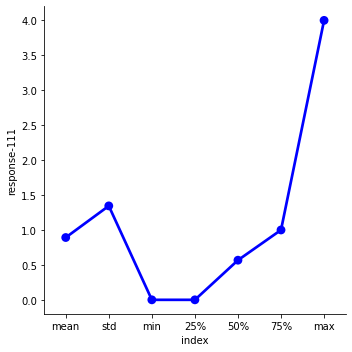

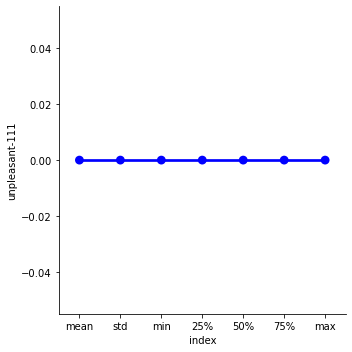

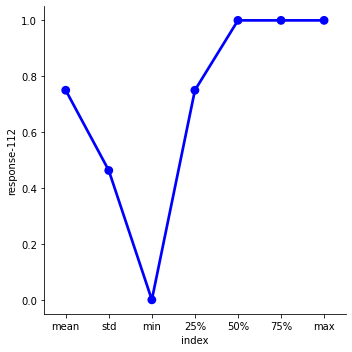

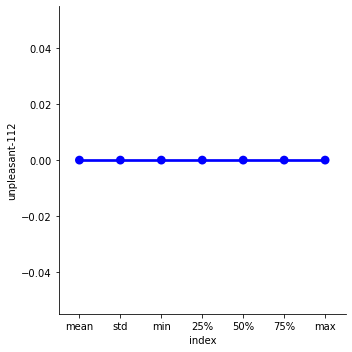

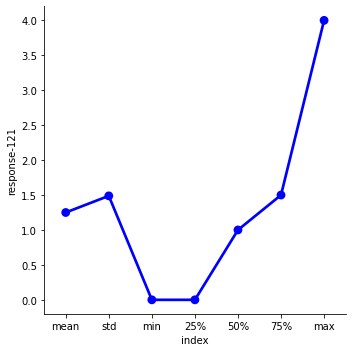

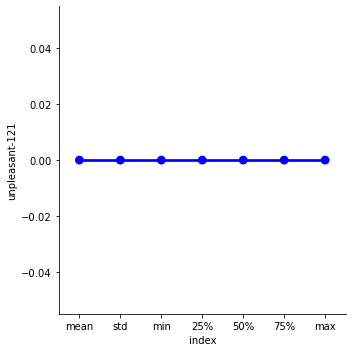

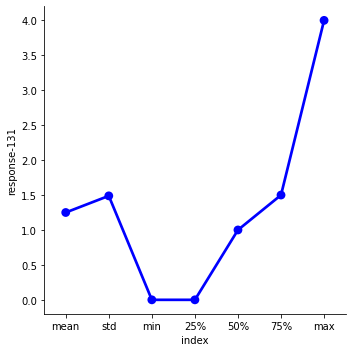

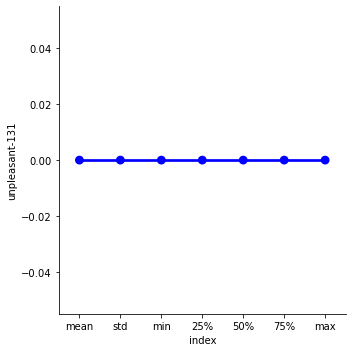

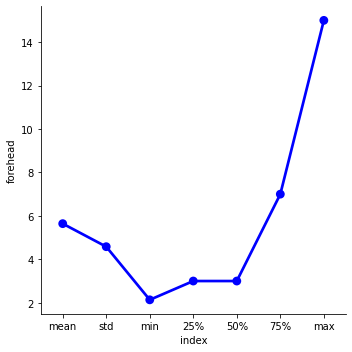

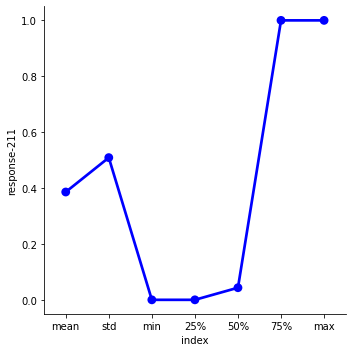

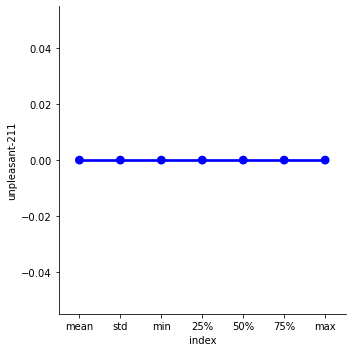

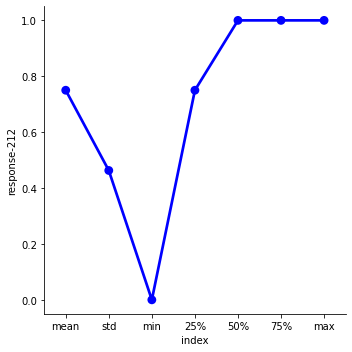

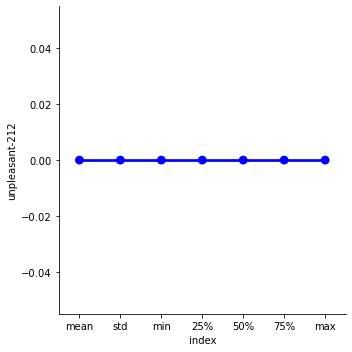

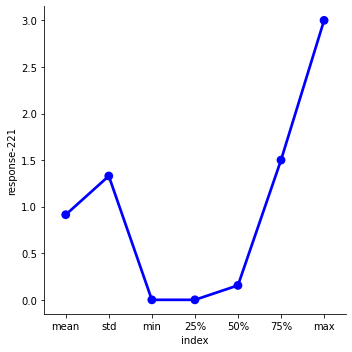

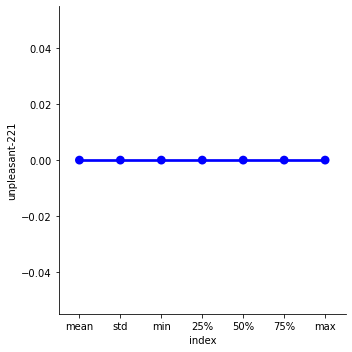

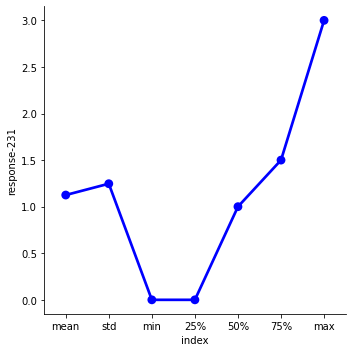

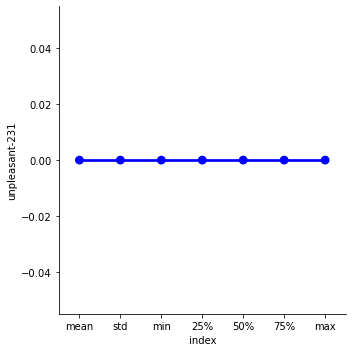

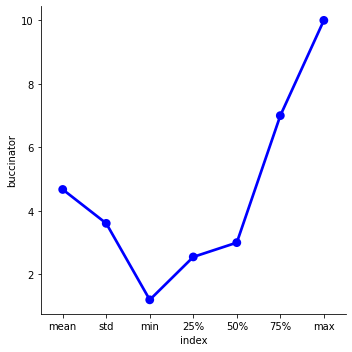

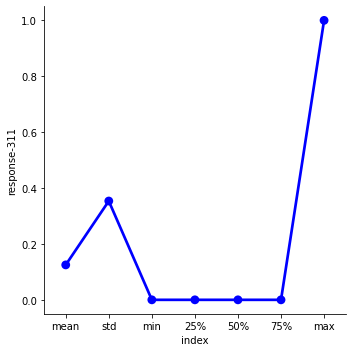

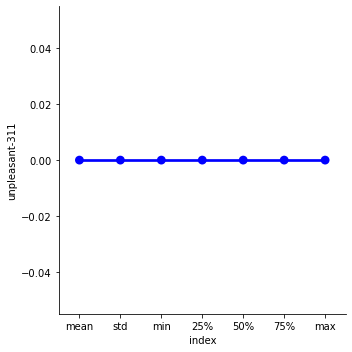

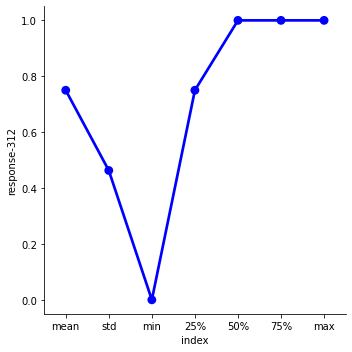

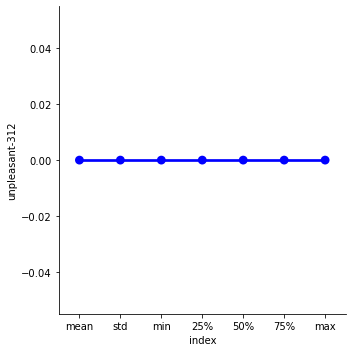

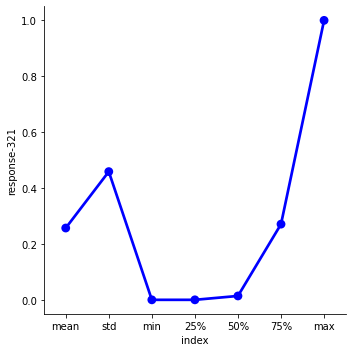

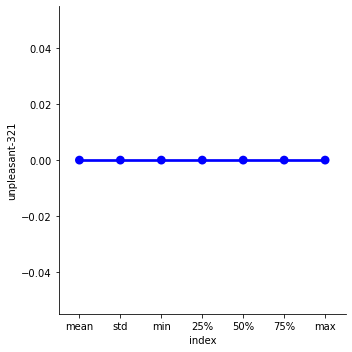

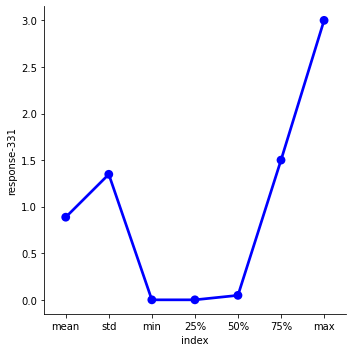

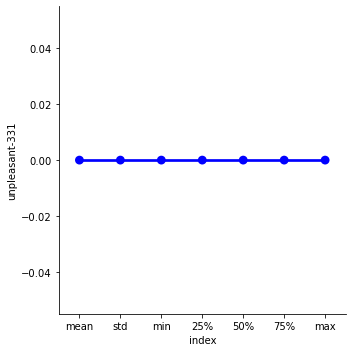

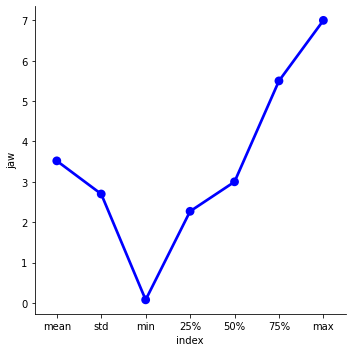

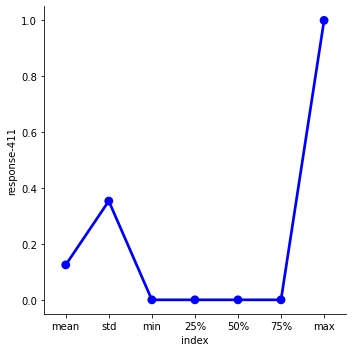

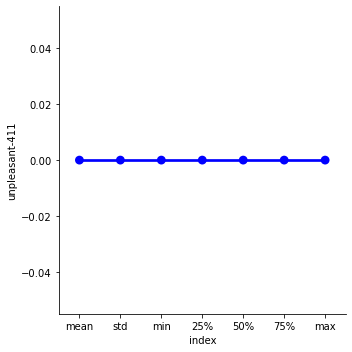

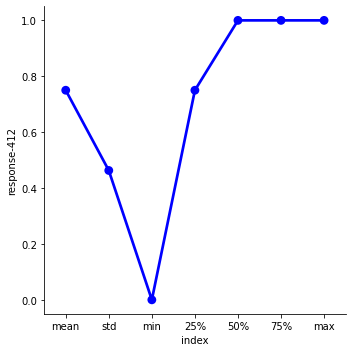

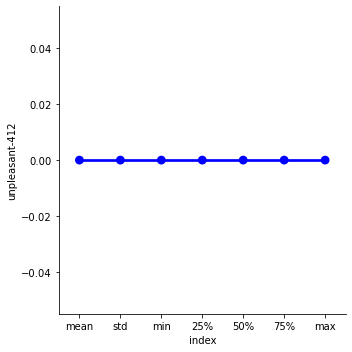

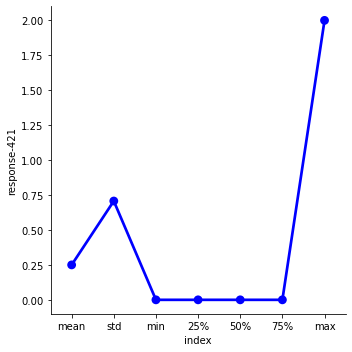

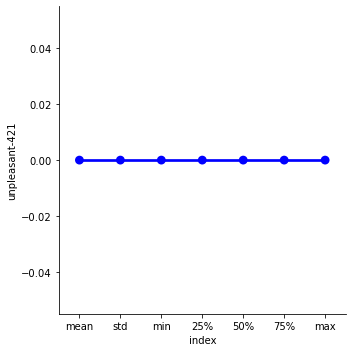

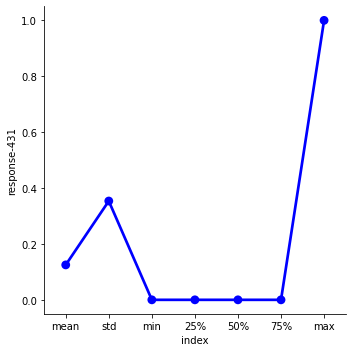

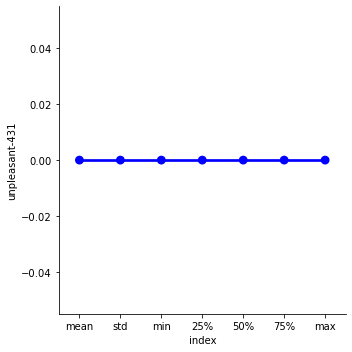

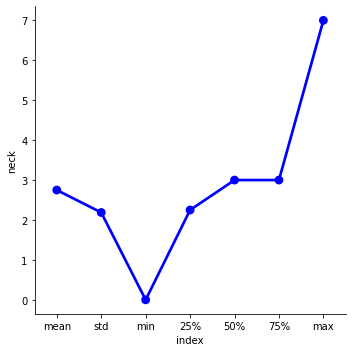

In [21]:
descriptive_df.reset_index(inplace=True)
# To remove any variable from plot

descriptive_df = descriptive_df[descriptive_df['index'] != 'count']
for i in num_col:
    if i in ['index']:    
        continue  
    sns.factorplot(x="index", y=i, data=descriptive_df)  
plt.show()

In [22]:
#fig, ax = plt.subplots(figsize=(25, 5))
#
#sns.barplot(data = main_dict['101'].iloc[0:3,:], ax = ax)

In [23]:
summary_table.iloc[0,2] + summary_table.iloc[0,4] + summary_table.iloc[0,4]

2.8571428571428568

### Defining Parameters & Settings (2)

In [24]:

# montage list
montages = ['forehead','buccinator','jaw','neck']

# sensation list
sensations = list(main_dict['101'].iloc[:, 1])

# list of column names
cols = np.array(main_dict['101']['question'])

# show all numbers in a specific float format (2 decimals)
pd.options.display.float_format = '{:,.2f}'.format




In [25]:
# how to get the means

main_dict_stats = main_dict['101'].describe()
main_dict_stats.index
main_dict_stats[1:2]

,response-111,unpleasant-111,response-112,unpleasant-112,response-121,unpleasant-121,response-131,unpleasant-131,forehead,response-211,...,jaw,response-411,unpleasant-411,response-412,unpleasant-412,response-421,unpleasant-421,response-431,unpleasant-431,neck
mean,0.89,0.00,0.75,0.00,1.25,0.00,1.25,0.00,5.64,0.39,...,3.52,0.12,0.00,0.75,0.00,0.25,0.00,0.12,0.00,2.75


In [26]:
#main_dict['101'].describe().to_excel("rawdata_description_python.xlsx")

# Investigate Sensations for each montage

## We want to look at different sensations for each montage
e.g. let's assume we put the electrode on the jaw, how are the sensations for our subjects?

## Step 1: Create the right dataset

In [27]:
# we want all sensations related to one montage in one dataframe
# so in each montage dataframe: rows subjects and columns sensation names (one total score in each cell)
# so we will have a dataframe for each montage --> a dictionary 


mont_dict = {}

# loop through montage names and exttract "sums" of sensations
for montage in montages:
    
    # first extract sensation data for one montage, all subjects into a list 
    temp_list = [main_dict[i][montage] for i in subj_list_str]
    
    # convert list to np array so that we can easily make a dataframe out of it
    temp_array = np.array(temp_list)

    # convert np array into a data fram and at the same time a general dictionary
    mont_dict[montage] = pd.DataFrame(temp_array, index = subj_list_str, columns = cols).astype(float)

# COOL! we now have a dictionarym with keys: montage names, call a montage to see all sensations for that 
mont_dict['jaw']

,itching,warmth,pricking,pain,phosphene_score_open,phosphene_score_closed,phosphene_area_open,phosphene_area_closed
101,3.00,3.00,5.00,3.00,7.00,7.00,0.08,0.08
102,4.00,3.00,6.00,3.00,5.00,5.00,0.23,0.30
103,6.00,3.00,6.00,3.00,5.00,4.00,0.23,0.16
104,6.00,3.00,3.00,3.00,6.00,6.00,1.00,2.00
105,3.00,5.00,6.00,3.00,5.00,5.00,0.81,0.22
106,9.00,3.00,3.00,4.00,7.00,8.00,1.10,1.43
107,7.00,3.00,8.00,3.00,7.00,6.00,0.70,0.74


<AxesSubplot:>

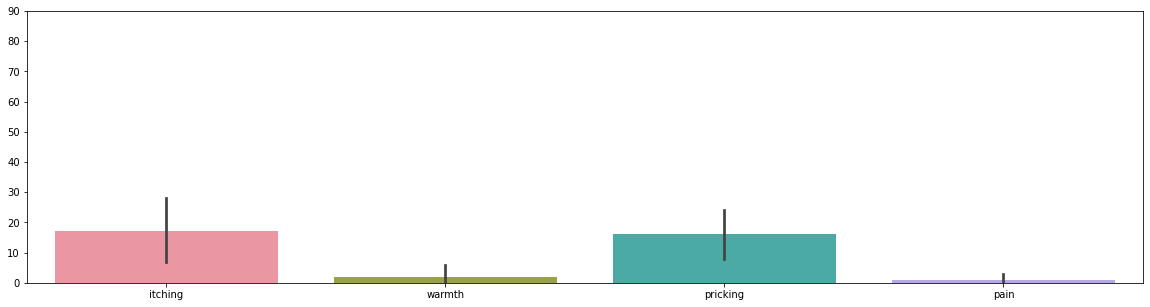

In [28]:
# Plot total sensations for each montage

fig, ax = plt.subplots(figsize=(20, 5))
ax.set_ylim([0, 90])

mont_dict_plot = mont_dict['jaw'].iloc[:,0:4] - 3
sns.barplot(data = mont_dict_plot, ax = ax, estimator = sum)

## Step 2: Define Null Hypothesis (H0) 

### H0-1 = phosphene is the same for all montages
### H0-2 = sensation scores are the same for all montages 

## Step 3-1: Test H0-1  


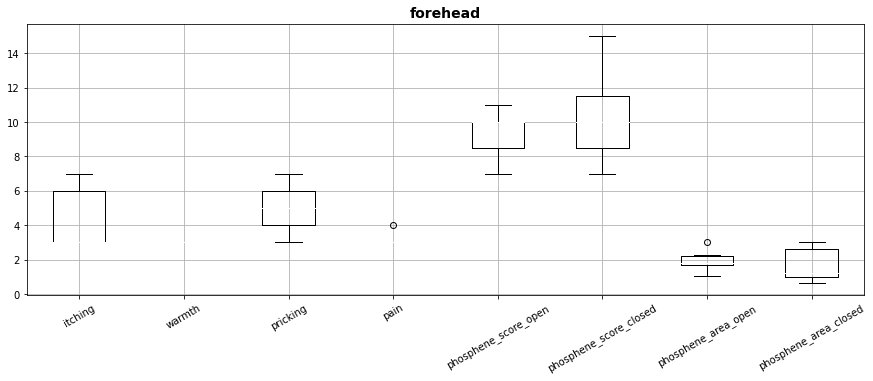

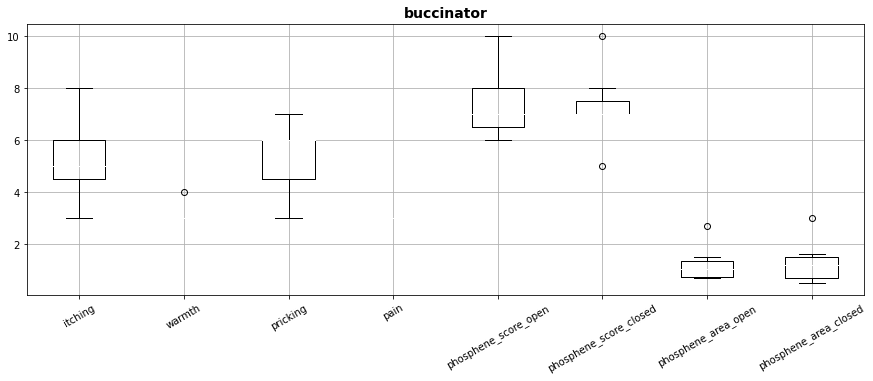

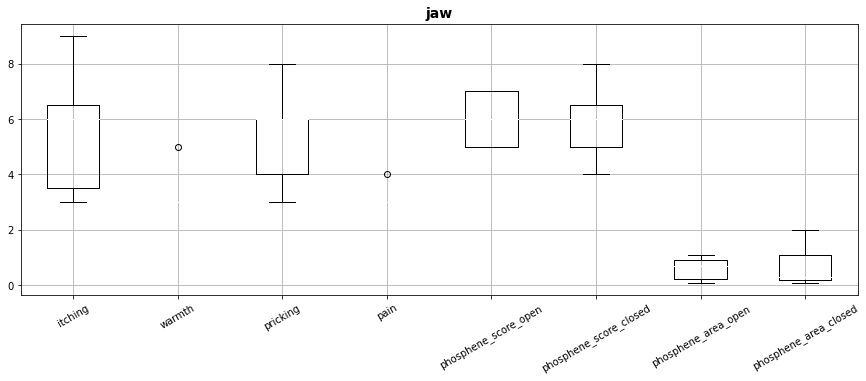

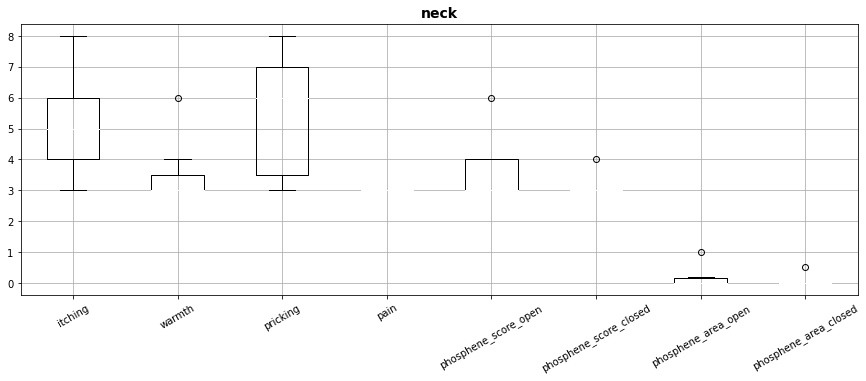

In [29]:
plot_dict = {}

for montage in montages:
    plot_dict = mont_dict[montage].boxplot(figsize = (15, 5), rot = 30, return_type = 'dict')
    plt.title(montage, fontsize=14, fontweight='bold')
    plt.show()

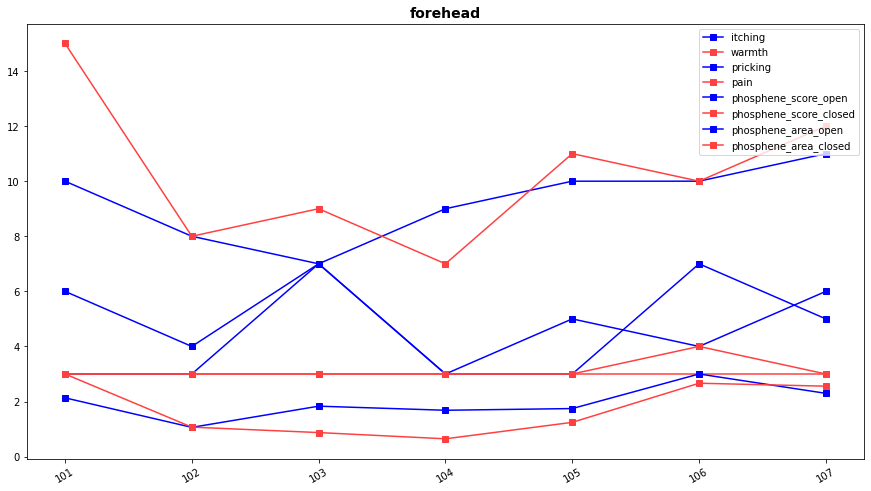

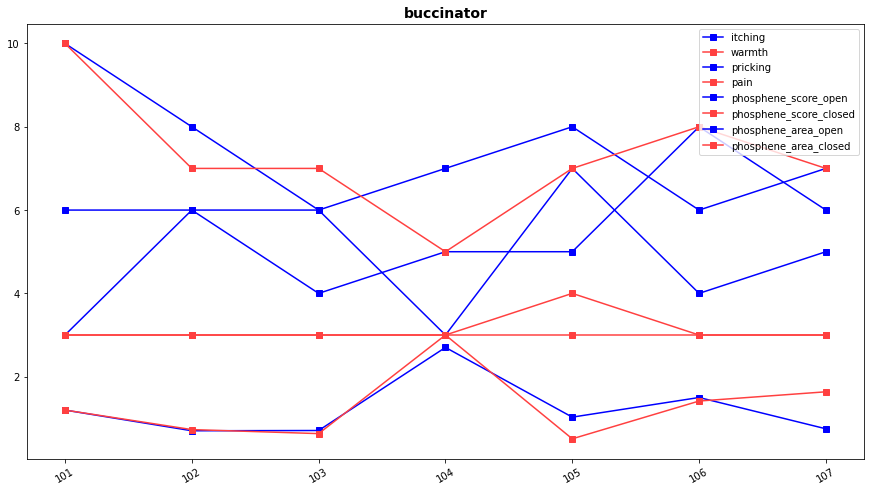

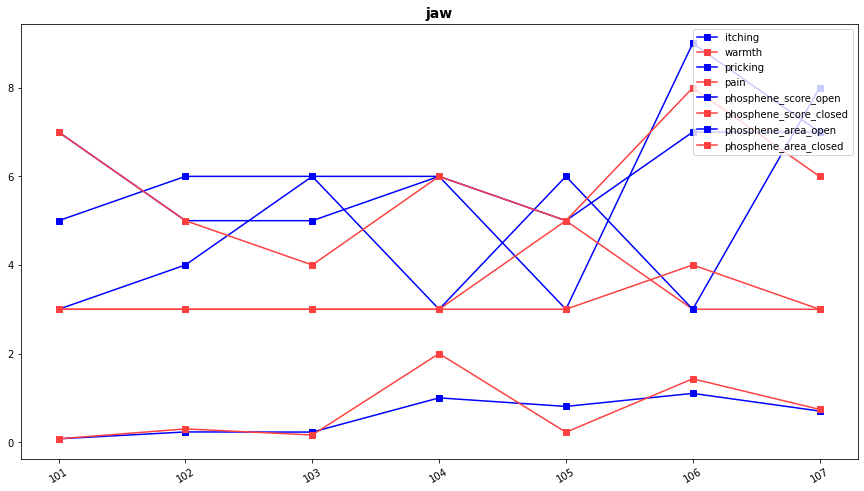

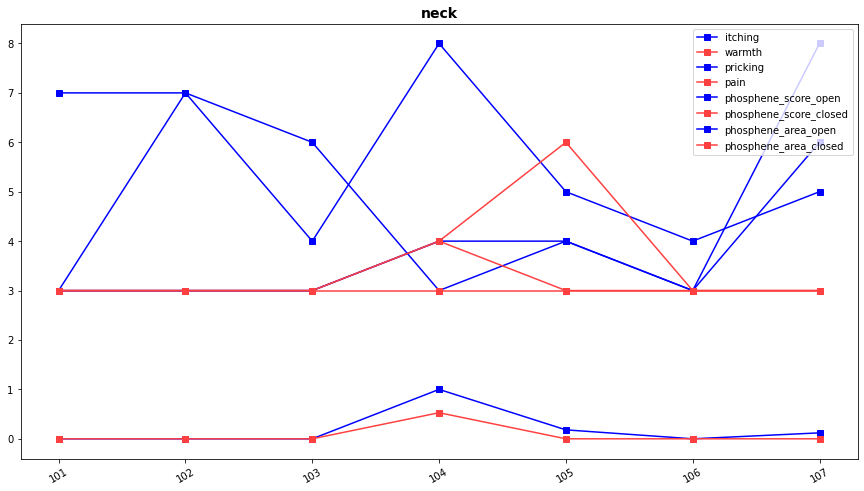

In [30]:
# Plot all sensations within a certain montage

# loop through montages
for montage in montages:
    
    # plot sensations for each montage
    plot_dict = mont_dict[montage].plot(marker = "s", figsize = (15, 8), rot = 30)
    
    # this loop adds errorbars for each sensation (it takes on value each time and you can't pass a dataframe to the function)
    #for sense in sensations:
     #   plot_dict.errorbar(mont_dict[montage].index, mont_dict[montage][sense], yerr = mont_dict[montage][sense].std())
    
    # title each plot with the montage name
    plt.title(montage, fontsize=14, fontweight='bold')
    
    # put the legend to upper right
    plt.legend(loc = "upper right");
    
    plt.show()

# Investigate Montages for each sensation

## We want to look at different montages for each sensation
e.g. which montage has the worst itching, pain, phosphene!, etc.

In [31]:
# compare itching between montages and between subjects

# we need another dataframs: for each sensations, rows subjects and columns montages (one total score in each cell) 
# so we will have a dataframe for each sensation --> a dictionary 

# initiate a dictionary to put multiple sensation dataframe in
sensation_dict = {}

temp_df = pd.DataFrame(index = subj_list_str, columns = montages)

# loop through sensations (itching, ...)
for sensation in sensations:
    # loop through montages
    for montage in montages:
        # extract scores and put them into the "sensation" dataframs
        temp_df[montage] = mont_dict[montage][sensation]
        
    # put the "sensation" dataframe in a dict, key: sensation
    sensation_dict[sensation] = temp_df
    
    # re-initiate the dataframe (to clear all values for the next loop)
    temp_df = pd.DataFrame(index = subj_list_str, columns = montages)


# COOL! we have a dictionary, keys are sensations, call a sensation ('itching') to get scores for all montages
sensation_dict['itching']

,forehead,buccinator,jaw,neck
101,3.00,3.00,3.00,3.00
102,3.00,6.00,4.00,7.00
103,7.00,4.00,6.00,4.00
104,3.00,5.00,6.00,8.00
105,3.00,5.00,3.00,5.00
106,7.00,8.00,9.00,4.00
107,5.00,6.00,7.00,5.00


### Plot all montages for a certain sensation

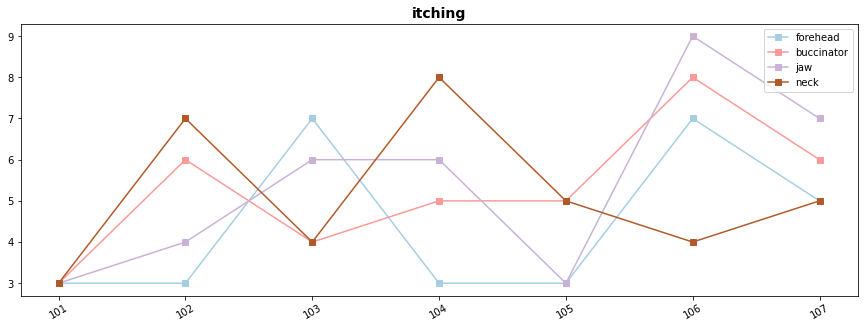

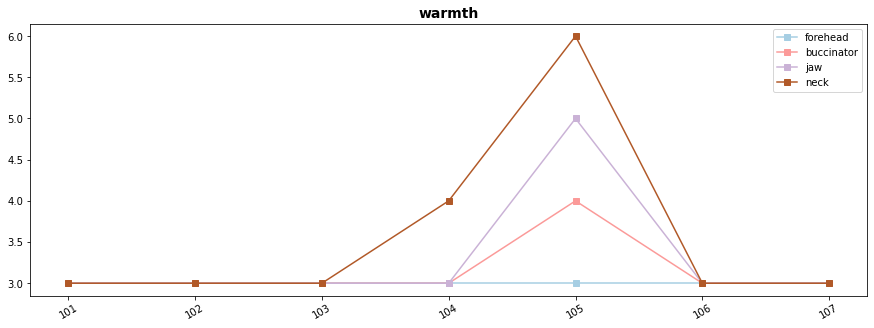

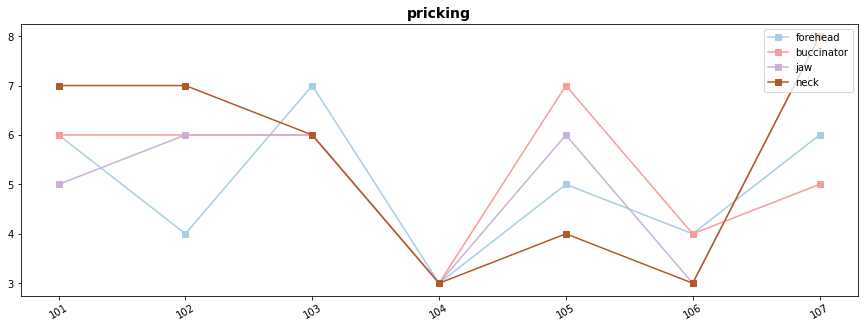

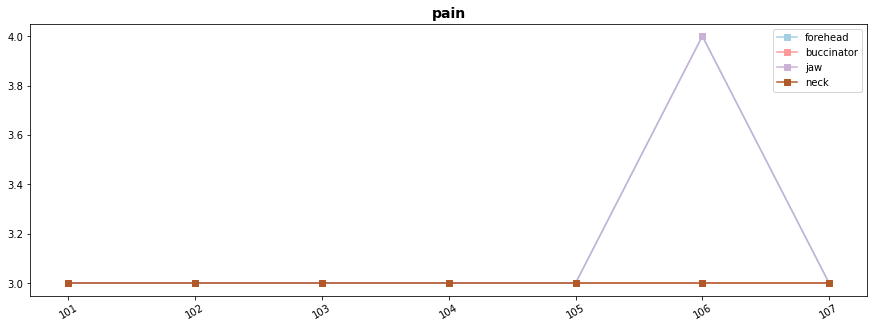

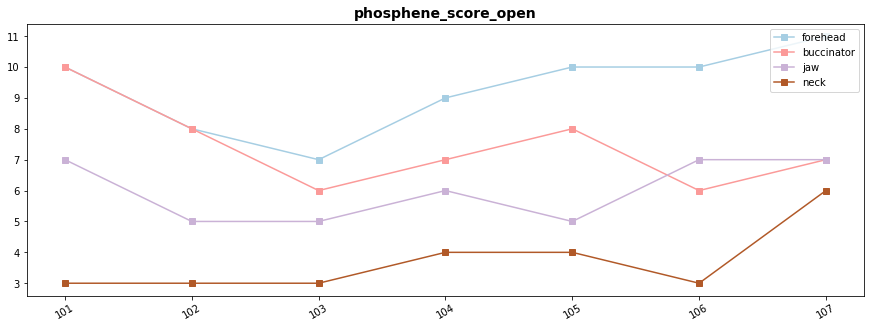

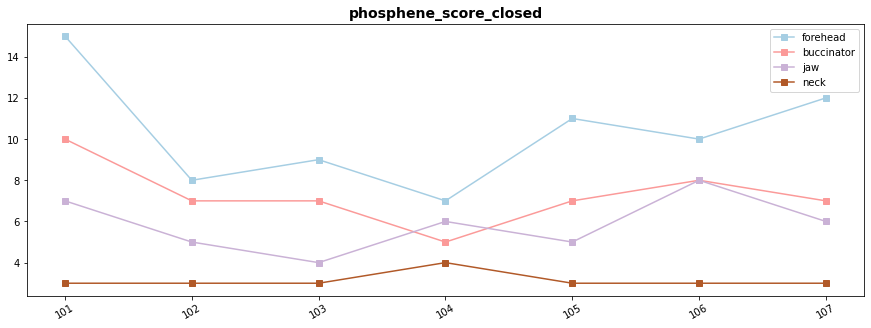

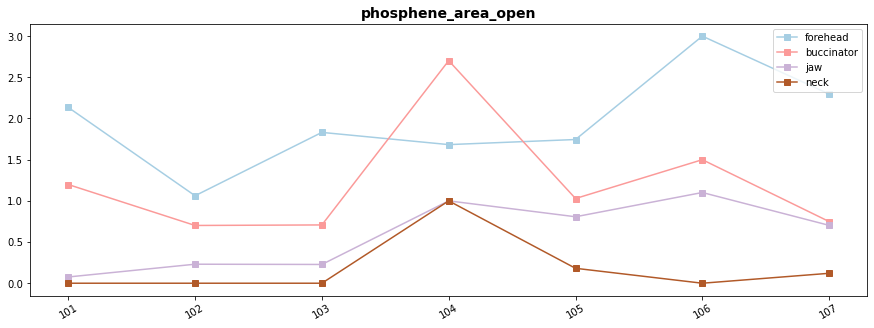

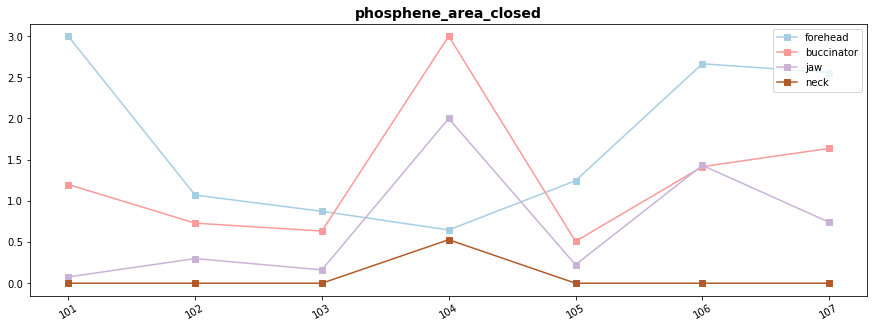

In [32]:
# loop through montages
for sense in sensations:
    
    # plot sensations for each montage
    my_axes = sensation_dict[sense].plot(marker = "s", figsize = (15, 5), rot = 30, colormap='Paired')
    
    # this loop adds errorbars for each sensation (it takes on value each time and you can't pass a dataframe to the function)
    #for montage in montages:
     #   my_axes.errorbar(sensation_dict[sense].index, sensation_dict[sense][montage], yerr = sensation_dict[sense][montage].std())
    
    # title each plot with the montage name
    plt.title(sense, fontsize=14, fontweight='bold')
    
    # put the legend to upper right
    plt.legend(loc = "upper right");

    plt.show()

## Does higher frequency correlate with stronger phosphene?


In [33]:
# Frequency

# we should compare frequencies for each montage
# 111, 121, 131
# 211, 221, 231
# 311, 321, 331
# 411, 421, 431

nested_dict_freq = {}


for subj in subj_list_str:
    
    nested_dict_freq[subj] = {'forehead'   : main_dict[subj][['question', 'response-111', 'response-121', 'response-131']].iloc[4:8, :].reset_index(drop = True),
                         'buccinator' : main_dict[subj][['question', 'response-211', 'response-221', 'response-231']].iloc[4:8, :].reset_index(drop = True),
                         'jaw'        : main_dict[subj][['question', 'response-311', 'response-321', 'response-331']].iloc[4:8, :].reset_index(drop = True),
                         'neck'       : main_dict[subj][['question', 'response-411', 'response-421', 'response-431']].iloc[4:8, :].reset_index(drop = True)
                        }
    
nested_dict_freq['101']['forehead']

,question,response-111,response-121,response-131
0,phosphene_score_open,1.00,3.00,3.00
1,phosphene_score_closed,4.00,4.00,4.00
2,phosphene_area_open,0.13,1.00,1.00
3,phosphene_area_closed,1.00,1.00,1.00


In [34]:
with pd.ExcelWriter('fulltable.xlsx') as writer:
    for subj in subj_list_str:
        for montage in montages:
            nested_dict_freq[subj][montage].iloc[2:4].to_excel(writer, sheet_name=subj+ montage)

### Frequency Analysis

In [35]:
# a function to empty the dataframes I use in this cell 
def emptydf(df):
    #df = df.reset_index(drop = True)
    
    for index, row in df.iterrows():
        df['5 < 10'].loc[index] = np.empty((0,0), str)
        df['10 < 30'].loc[index] = np.empty((0,0), str)
        df['5 < 30'].loc[index] = np.empty((0,0), str)
        
    return df


# guide to find which columns:

# 5Hz: response-111 : iloc[cond,1]
# 10Hz: response-121 : iloc[cond,2]
# 10Hz: response-131 : iloc[cond,3]

# conditions are indices in the main dataframe
# cond 0: phosphene_score_open
# cond 1: phosphene_score_close
# cond 2: phosphene_area_open
# cond 3: phosphene_area_close


# a dataframe for meaningful difference (Wilcoxon)
#freq_stats_df = pd.DataFrame(index = subj_list_str, columns = ['5 < 10', '10 < 30', '5 < 30']).astype(str)
#emptydf(freq_stats_df)


# we need a dictionary for conditions, keys: ph_open(0), ph_close(1), ph_area_op(2), ph_area_cl(3)
freq_res_dict = {}
freq_stats_dict = {}

conditions = [0,1,2,3]

# each value in dict should be an empty dataframe with a specific format, so let's initiate it
for cond in conditions:
    
    # initiate an ampty dataframe, we want 3 columns to compare each two freq condition results for each subject
    freq_res_dict[cond] = pd.DataFrame(index = subj_list_str, columns = ['5 < 10', '10 < 30', '5 < 30']).astype(str)
    freq_stats_dict[cond] = pd.DataFrame(index = subj_list_str, columns = ['5 < 10', '10 < 30', '5 < 30']).astype(str)
    # call empty function (above) to put empty np arrays in each element
    freq_res_dict[cond] = emptydf(freq_res_dict[cond])
    freq_stats_dict[cond] = emptydf(freq_stats_dict[cond])

# loop through conditions, subjects and then montages, make the comparison and put the positive montages into dataframes
for cond in conditions:
    
    for subj in subj_list_str:
        
        for montage in montages:
            
            # 5 , 10
            t,p = stats.wilcoxon(nested_dict_freq[subj][montage].iloc[:,1] , nested_dict_freq[subj][montage].iloc[:,2], zero_method = "zsplit")
            # uncomment if you want to see the Wilcoxon results
            # print(f'for, {subj} , and {montage} --> {(t,p)}')

            if (evaluate_p(p, statement = False) != 'low -almost no- significance because P-Value is >10%'):
                freq_stats_dict[cond]['5 < 10'].loc[subj] = np.append(freq_stats_dict[cond]['5 < 10'].loc[subj], montage)

            if (nested_dict_freq[subj][montage].iloc[cond,1] < nested_dict_freq[subj][montage].iloc[cond,2]):
                freq_res_dict[cond]['5 < 10'].loc[subj] = np.append(freq_res_dict[cond]['5 < 10'].loc[subj], montage)
            p = 0

            # 10 , 30
            t,p = stats.wilcoxon(nested_dict_freq[subj][montage].iloc[:,2] , nested_dict_freq[subj][montage].iloc[:,3], zero_method = "zsplit")
            if (evaluate_p(p, statement = False) != 'low -almost no- significance because P-Value is >10%'):
                freq_stats_dict[cond]['10 < 30'].loc[subj] = np.append(freq_stats_dict[cond]['10 < 30'].loc[subj], montage)

            if (nested_dict_freq[subj][montage].iloc[cond,2] < nested_dict_freq[subj][montage].iloc[cond,3]):
                freq_res_dict[cond]['10 < 30'].loc[subj] = np.append(freq_res_dict[cond]['10 < 30'].loc[subj], montage)
            p = 0

            # 5 , 30
            t,p = stats.wilcoxon(nested_dict_freq[subj][montage].iloc[:,1] , nested_dict_freq[subj][montage].iloc[:,3], zero_method = "zsplit")
            if (evaluate_p(p, statement = False) != 'low -almost no- significance because P-Value is >10%'):
                freq_stats_dict[cond]['5 < 30'].loc[subj] = np.append(freq_stats_dict[cond]['5 < 30'].loc[subj], montage)

            if (nested_dict_freq[subj][montage].iloc[cond,1] < nested_dict_freq[subj][montage].iloc[cond,3]):
                freq_res_dict[cond]['5 < 30'].loc[subj] = np.append(freq_res_dict[cond]['5 < 30'].loc[subj], montage)
            p = 0


# but I guess we can still look at the differences:
freq_res_dict[1]
#freq_stats_dict[0]

C:\Users\Sadeg\anaconda3\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\Sadeg\anaconda3\lib\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,5 < 10,10 < 30,5 < 30
101,"[buccinator, jaw]",[jaw],"[buccinator, jaw]"
102,"[buccinator, jaw]",[forehead],"[forehead, jaw]"
103,"[forehead, buccinator, jaw]",[],[]
104,[forehead],[neck],[neck]
105,"[forehead, buccinator, jaw]",[],"[forehead, jaw]"
106,[forehead],[],[forehead]
107,[buccinator],[],[]


In [36]:
# a function to empty the dataframes I use in this cell 
def emptydf(df):
    #df = df.reset_index(drop = True)
    
    for index, row in df.iterrows():
        df['5 < 10'].loc[index] = np.empty((0,0), str)
        df['10 < 30'].loc[index] = np.empty((0,0), str)
        df['5 < 30'].loc[index] = np.empty((0,0), str)
        
    return df


# guide to find which columns:

# 5Hz: response-111 : iloc[cond,1]
# 10Hz: response-121 : iloc[cond,2]
# 10Hz: response-131 : iloc[cond,3]

# conditions are indices in the main dataframe
# cond 0: phosphene_score_open
# cond 1: phosphene_score_close
# cond 2: phosphene_area_open
# cond 3: phosphene_area_close


# a dataframe for meaningful difference (Wilcoxon)
#freq_stats_df = pd.DataFrame(index = subj_list_str, columns = ['5 < 10', '10 < 30', '5 < 30']).astype(str)
#emptydf(freq_stats_df)


# we need a dictionary for conditions, keys: ph_open(0), ph_close(1), ph_area_op(2), ph_area_cl(3)
freq_res_dict = {}
freq_stats_dict = {}

conditions = [0,1,2,3]

# each value in dict should be an empty dataframe with a specific format, so let's initiate it
for cond in conditions:
    
    # initiate an ampty dataframe, we want 3 columns to compare each two freq condition results for each subject
    freq_res_dict[cond] = pd.DataFrame(index = subj_list_str, columns = ['5 < 10', '10 < 30', '5 < 30']).astype(str)
    freq_stats_dict[cond] = pd.DataFrame(index = subj_list_str, columns = ['5 < 10', '10 < 30', '5 < 30']).astype(str)
    # call empty function (above) to put empty np arrays in each element
    freq_res_dict[cond] = emptydf(freq_res_dict[cond])
    freq_stats_dict[cond] = emptydf(freq_stats_dict[cond])

# loop through conditions, subjects and then montages, make the comparison and put the positive montages into dataframes
for cond in conditions:
    
    for subj in subj_list_str:
        
        for montage in montages:
            
            # 5 , 10
            t,p = stats.wilcoxon(nested_dict_freq[subj][montage].iloc[:,1] , nested_dict_freq[subj][montage].iloc[:,2], zero_method = "zsplit")
            # uncomment if you want to see the Wilcoxon results
            # print(f'for, {subj} , and {montage} --> {(t,p)}')

            #if (evaluate_p(p, statement = False) != 'low -almost no- significance because P-Value is >10%'):
            freq_stats_dict[cond]['5 < 10'].loc[subj] = np.append(freq_stats_dict[cond]['5 < 10'].loc[subj], f'{p:.2f}')

            if (nested_dict_freq[subj][montage].iloc[cond,1] < nested_dict_freq[subj][montage].iloc[cond,2]):
                freq_res_dict[cond]['5 < 10'].loc[subj] = np.append(freq_res_dict[cond]['5 < 10'].loc[subj], montage)
            p = 0

            # 10 , 30
            t,p = stats.wilcoxon(nested_dict_freq[subj][montage].iloc[:,2] , nested_dict_freq[subj][montage].iloc[:,3], zero_method = "zsplit")
            #if (evaluate_p(p, statement = False) != 'low -almost no- significance because P-Value is >10%'):
            freq_stats_dict[cond]['10 < 30'].loc[subj] = np.append(freq_stats_dict[cond]['10 < 30'].loc[subj], f'{p:.2f}')

            if (nested_dict_freq[subj][montage].iloc[cond,2] < nested_dict_freq[subj][montage].iloc[cond,3]):
                freq_res_dict[cond]['10 < 30'].loc[subj] = np.append(freq_res_dict[cond]['10 < 30'].loc[subj], montage)
            p = 0

            # 5 , 30
            t,p = stats.wilcoxon(nested_dict_freq[subj][montage].iloc[:,1] , nested_dict_freq[subj][montage].iloc[:,3], zero_method = "zsplit")
            #if (evaluate_p(p, statement = False) != 'low -almost no- significance because P-Value is >10%'):
            freq_stats_dict[cond]['5 < 30'].loc[subj] = np.append(freq_stats_dict[cond]['5 < 30'].loc[subj], f'{p:.2f}')

            if (nested_dict_freq[subj][montage].iloc[cond,1] < nested_dict_freq[subj][montage].iloc[cond,3]):
                freq_res_dict[cond]['5 < 30'].loc[subj] = np.append(freq_res_dict[cond]['5 < 30'].loc[subj], montage)
            p = 0


# but I guess we can still look at the differences:
freq_res_dict[1]
#freq_stats_dict[0]

C:\Users\Sadeg\anaconda3\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\Sadeg\anaconda3\lib\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,5 < 10,10 < 30,5 < 30
101,"[buccinator, jaw]",[jaw],"[buccinator, jaw]"
102,"[buccinator, jaw]",[forehead],"[forehead, jaw]"
103,"[forehead, buccinator, jaw]",[],[]
104,[forehead],[neck],[neck]
105,"[forehead, buccinator, jaw]",[],"[forehead, jaw]"
106,[forehead],[],[forehead]
107,[buccinator],[],[]


In [37]:
# if we look at freq_stats_df, we see that it's all empty!
# so conclusion: no phosphene difference due to frequency difference is meaningful
# we included areas here as well

freq_stats_dict[0].to_excel("Wilcoxon_p_ph_op_freq.xlsx")
freq_stats_dict[1].to_excel("Wilcoxon_p_ph_cl_freq.xlsx")

In [38]:
#sns.heatmap(freq_stats_dict[0], annot=True)

In [39]:
#statsmodels.stats.multitest.fdrcorrection(freq_stats_dict[0]['5 < 10'].loc['101'])

### When do we have increase in phosphene with increase in frequency? 
which montages?

In [40]:
# we compared the conditions above and found out which montages for each subject fulfill this condition,
# now we want to know if these occurances are enough to conclude?
# so what we want is the "mode", how many times is 'forehead' repeated in the above table 

# initiate 3 lists, we want to put all montages in them 
freq_list_5 = []
freq_list_10 = []
freq_list_30 = []

how_often_5 = [0,0,0,0]
how_often_10 = [0,0,0,0]
how_often_30 = [0,0,0,0]


# loop through rows, extract each element from the dataframe and put them into 3 separate lists
for cond in conditions:
    # remove the index so that we can iterate below
    freq_res_dict[cond] = freq_res_dict[cond].reset_index(drop = True)
    
    freq_list_5 = []
    freq_list_10 = []
    freq_list_30 = []
    
    for index, row in freq_res_dict[cond].iterrows():
        freq_list_5 = freq_list_5 + [freq_res_dict[cond].iloc[index,0][i] for i in range(len(freq_res_dict[cond].iloc[index,0]))]
        freq_list_10 = freq_list_10 + [freq_res_dict[cond].iloc[index,1][i] for i in range(len(freq_res_dict[cond].iloc[index,1]))]
        freq_list_30 = freq_list_30 + [freq_res_dict[cond].iloc[index,2][i] for i in range(len(freq_res_dict[cond].iloc[index,2]))]


    # now time for statistics!
    
    how_often_5[cond] = int(100* len(freq_list_5)/28)
    print(f'for condition {cond}:')
    print(f'5<10: in {how_often_5[cond]}% of cases there is a difference,\n most dominant montage:\n {stats.mode(freq_list_5)}, out of {len(freq_list_5)} montages, so {np.round(100* stats.mode(freq_list_5).count/len(freq_list_5))}%')
    print(f' montages in which we have difference in phosphene: {freq_list_5} \n')

    how_often_10[cond] = int(100* len(freq_list_10)/28)
    print(f'10<30: in {how_often_10[cond]}% of cases there is a difference,\n most dominant montage:\n {stats.mode(freq_list_10)}, out of {len(freq_list_10)} montages, so {np.round(100* stats.mode(freq_list_10).count/len(freq_list_10))}%')
    print(f' montages in which we have difference in phosphene: {freq_list_10} \n')

    how_often_30[cond] = int(100* len(freq_list_30)/28)
    print(f'5<30: in {how_often_30[cond]}% of cases there is a difference,\n most dominant montage:\n {stats.mode(freq_list_30)}, out of {len(freq_list_30)} montages, so {np.round(100* stats.mode(freq_list_30).count/len(freq_list_30))}%')
    print(f' montages in which we have difference in phosphene: {freq_list_30} \n')

    
# again guide
# condition 0 is phosphene score open eyes and so on
# first line is 5<

print(f'average frequency of the times that 5 < 10: {np.mean(how_often_5)}%')
print(f'average frequency of the times that 10 < 30: {np.mean(how_often_10)}%')
print(f'average frequency of the times that 5 < 30: {np.mean(how_often_30)}%')

print(f'on average, forehead is present in 42% of cases, buccinator in 33% and jaw in 25%')

for condition 0:
5<10: in 57% of cases there is a difference,
 most dominant montage:
 ModeResult(mode=array(['forehead'], dtype='<U10'), count=array([6])), out of 16 montages, so [38.]%
 montages in which we have difference in phosphene: ['forehead', 'buccinator', 'jaw', 'buccinator', 'jaw', 'forehead', 'jaw', 'forehead', 'neck', 'forehead', 'buccinator', 'jaw', 'neck', 'forehead', 'jaw', 'forehead'] 

10<30: in 21% of cases there is a difference,
 most dominant montage:
 ModeResult(mode=array(['buccinator'], dtype='<U10'), count=array([2])), out of 6 montages, so [33.]%
 montages in which we have difference in phosphene: ['jaw', 'forehead', 'forehead', 'buccinator', 'buccinator', 'jaw'] 

5<30: in 57% of cases there is a difference,
 most dominant montage:
 ModeResult(mode=array(['forehead'], dtype='<U10'), count=array([6])), out of 16 montages, so [38.]%
 montages in which we have difference in phosphene: ['forehead', 'buccinator', 'jaw', 'forehead', 'buccinator', 'jaw', 'jaw', 'for

## Conclusion - Frequency:
meaningful differences occur only in buccinator and forehad, then jaw <br>
always 5 < 10 is 35-38%, then 10 < 30 is 30-33%, then 5 < 30 is 38% <br>
so we can say if we go from 5 Hz to 10 Hz we have more phosphene, from 10 to 30 not that much, but from 5 to 30 more phosphene (10 & 30 are equal) <br>
area: open eyes is the same, but the difference in frequency shows itself very clearly in closed eyes, and in jaw??<br>

no meaningful Wilcoxon Test results

C:\Users\Sadeg\AppData\Local\Temp/ipykernel_71148/3396725067.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure();


<Figure size 432x288 with 0 Axes>

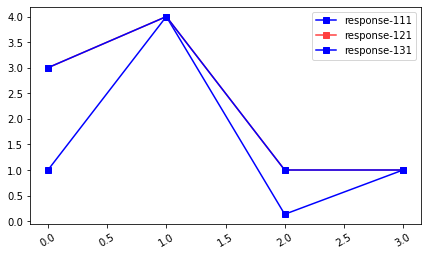

<Figure size 432x288 with 0 Axes>

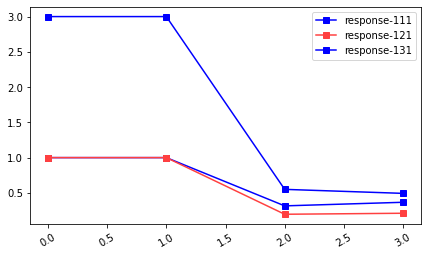

<Figure size 432x288 with 0 Axes>

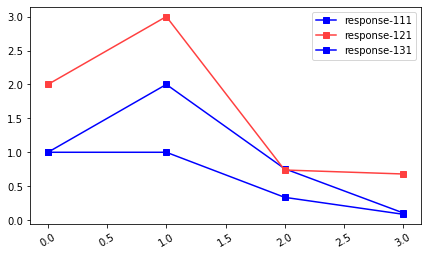

<Figure size 432x288 with 0 Axes>

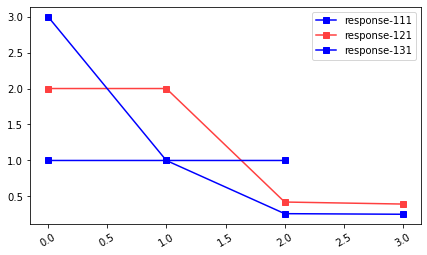

<Figure size 432x288 with 0 Axes>

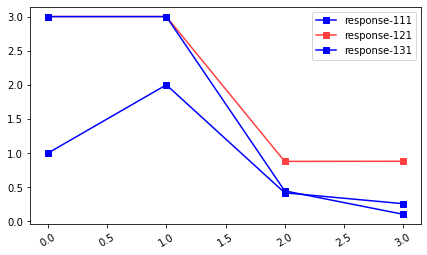

<Figure size 432x288 with 0 Axes>

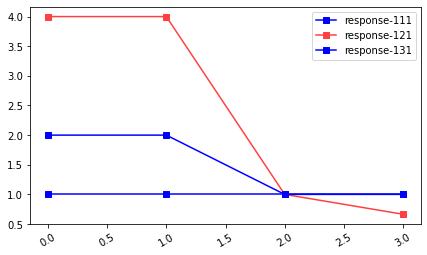

<Figure size 432x288 with 0 Axes>

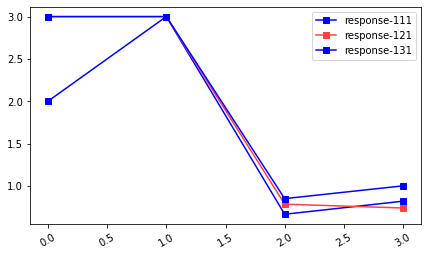

<Figure size 432x288 with 0 Axes>

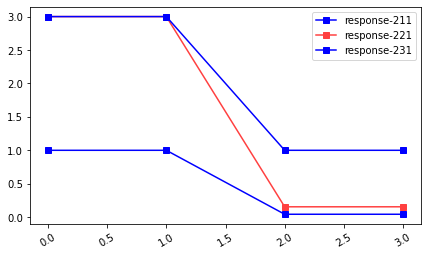

<Figure size 432x288 with 0 Axes>

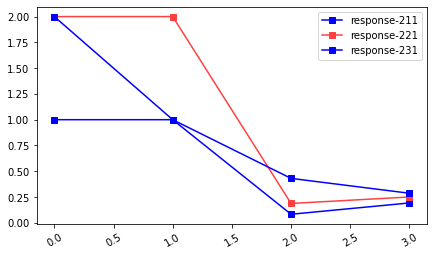

<Figure size 432x288 with 0 Axes>

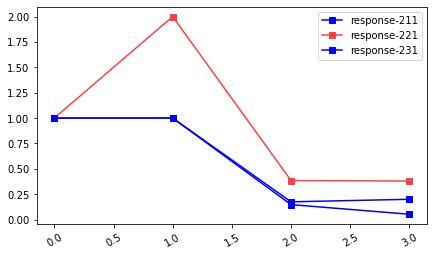

<Figure size 432x288 with 0 Axes>

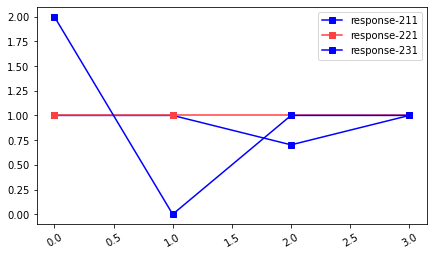

<Figure size 432x288 with 0 Axes>

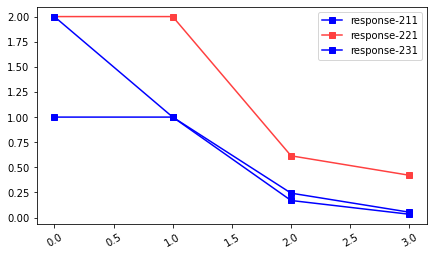

<Figure size 432x288 with 0 Axes>

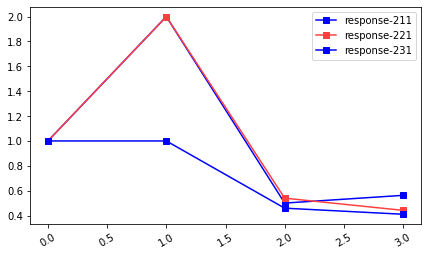

<Figure size 432x288 with 0 Axes>

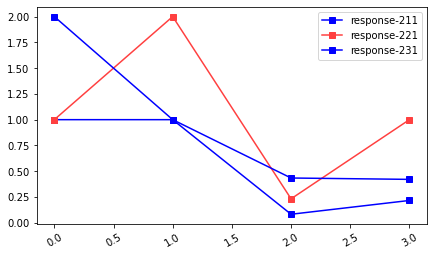

<Figure size 432x288 with 0 Axes>

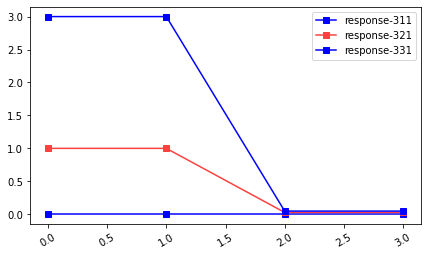

<Figure size 432x288 with 0 Axes>

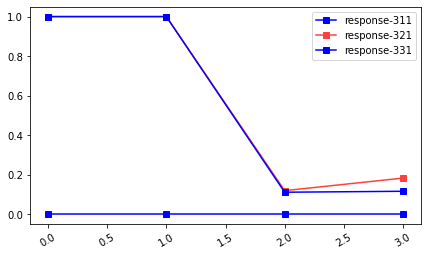

<Figure size 432x288 with 0 Axes>

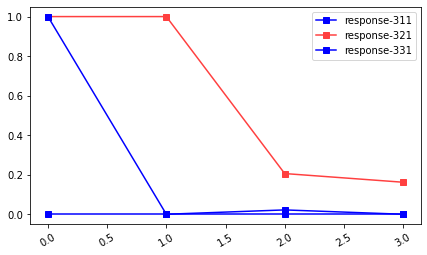

<Figure size 432x288 with 0 Axes>

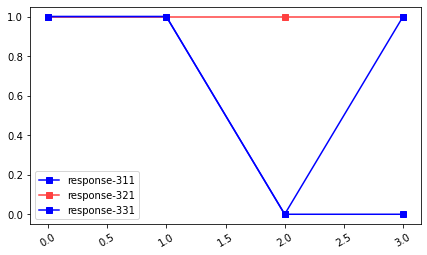

<Figure size 432x288 with 0 Axes>

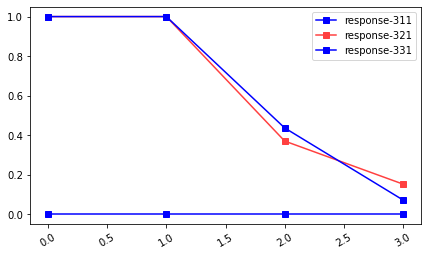

<Figure size 432x288 with 0 Axes>

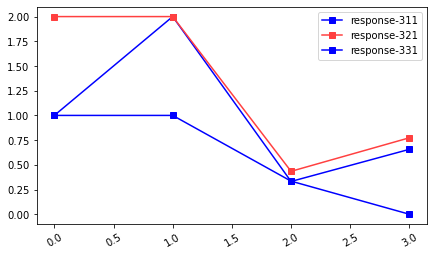

<Figure size 432x288 with 0 Axes>

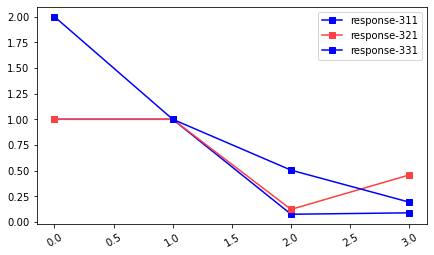

<Figure size 432x288 with 0 Axes>

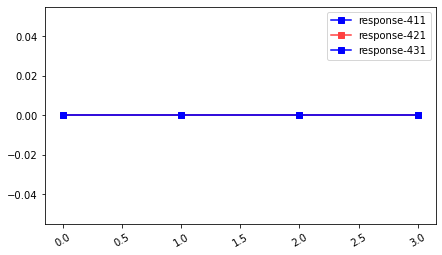

<Figure size 432x288 with 0 Axes>

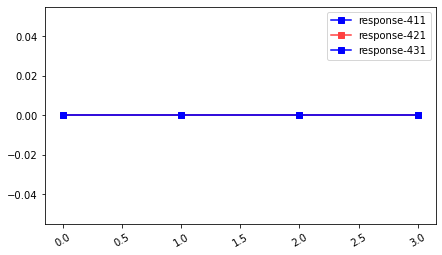

<Figure size 432x288 with 0 Axes>

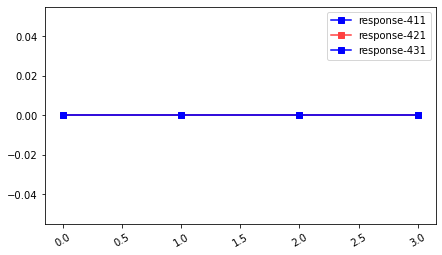

<Figure size 432x288 with 0 Axes>

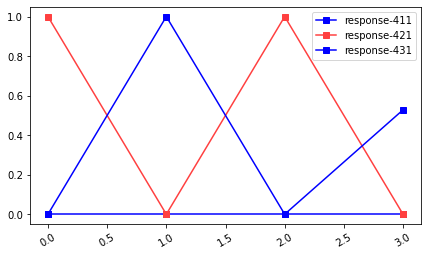

<Figure size 432x288 with 0 Axes>

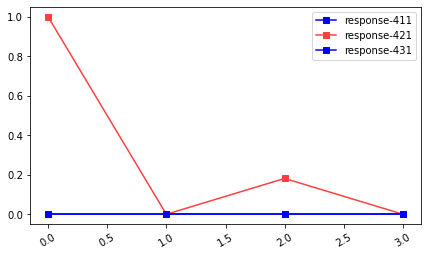

<Figure size 432x288 with 0 Axes>

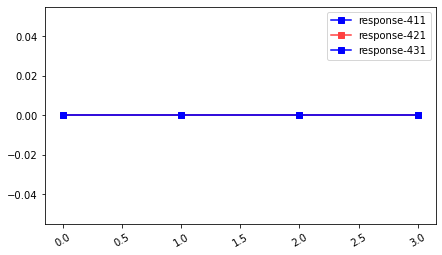

<Figure size 432x288 with 0 Axes>

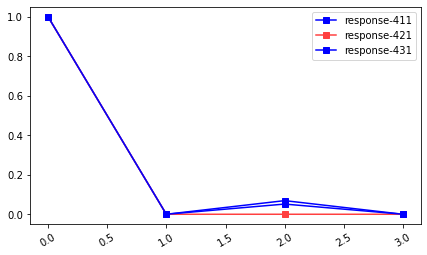

In [41]:
# just to visualize

for montage in montages:
    
    for subj in subj_list_str:
        # plot sensations for each montage
        plt.figure();
        ax = nested_dict_freq[subj][montage].plot(marker = "s", figsize = (7, 4), rot = 30);
    
        # this loop adds errorbars for each sensation (it takes on value each time and you can't pass a dataframe to the function)
        #for sense in sensations:
         #   plot_dict.errorbar(mont_dict[montage].index, mont_dict[montage][sense], yerr = mont_dict[montage][sense].std())
    
    # title each plot with the montage name
    #plt.title(montage, fontsize=14, fontweight='bold')
 #       plt.title(f'phosphene changeing with frequency for subj {subj}')
 #       plt.xlabel('scores (ph_op, ph_cl, ph_area_op, ph_area_cl)')
#        plt.ylabel('Intensity of Phosphene or area')
#    
#        plt.legend(loc = "upper right");
#plt.show()
    # put the legend to upper right
    


## Does higher amplitude correlate with stronger phosphene?


In [42]:
# Amplitude

# we need a "nested" dictionary: key1: subject, key2: montage, values: (column=amp, rows=sensations)

# first only amplitude (constant frequency)
# that means we should compare 111 with 112, 211 with 212, 311 with 312, 411 with 412 
# number 2 at the end represents zero amp(sham) 

nested_dict_amp = {}

for subj in subj_list_str:
    
    # key1: subject, key2(manual): montages
    # head --> let's remove areas for now (can be added later!!)
    # reindex: witout it, we'll have 1 to 6 but we want our sensations (questions)!
    
    #df_forehead = main_dict[subj][['question', 'response-111', 'response-112']].head(6)
    #df_forehead = df_forehead.reset_index(drop=True)
    
    nested_dict_amp[subj] = {'forehead'   : main_dict[subj][['question', 'response-111', 'response-112']].iloc[4:8, :].reset_index(drop = True),
                         'buccinator' : main_dict[subj][['question', 'response-211', 'response-212']].iloc[4:8, :].reset_index(drop = True),
                         'jaw'        : main_dict[subj][['question', 'response-311', 'response-312']].iloc[4:8, :].reset_index(drop = True),
                         'neck'       : main_dict[subj][['question', 'response-411', 'response-412']].iloc[4:8, :].reset_index(drop = True)
                        }
    

nested_dict_amp['101']['forehead']


,question,response-111,response-112
0,phosphene_score_open,1.00,1.00
1,phosphene_score_closed,4.00,1.00
2,phosphene_area_open,0.13,0.00
3,phosphene_area_closed,1.00,0.00


In [43]:
# a function to empty the dataframes I use in this cell 
def emptydf(df):

    for index, row in df.iterrows():
        for montage in montages:
            df[montage].loc[index] = np.empty((0,0), str)
            df[montage].loc[index] = np.empty((0,0), str)
            df[montage].loc[index] = np.empty((0,0), str)
        
    return df


# guide to find which columns:

# 5Hz: response-111 : iloc[cond,1]
# 10Hz: response-121 : iloc[cond,2]
# 10Hz: response-131 : iloc[cond,3]

# conditions are indices in the main dataframe
# cond 0: phosphene_score_open
# cond 1: phosphene_score_close
# cond 2: phosphene_area_open
# cond 3: phosphene_area_close


# a dataframe for meaningful difference (Wilcoxon)
amp_stats_df = pd.DataFrame(index = subj_list_str, columns = montages).astype(str)
#emptydf(amp_stats_df)


# we need a dictionary for conditions, keys: ph_open(0), ph_close(1), ph_area_op(2), ph_area_cl(3)
amp_res_dict = {}
amp_stats_dict = {}

conditions = [0,1,2,3]

# each value in dict should be an empty dataframe with a specific format, so let's initiate it
for cond in conditions:
    
    # initiate an ampty dataframe, we want 3 columns to compare each two freq condition results for each subject
    amp_res_dict[cond] = pd.DataFrame(index = subj_list_str, columns = montages).astype(str)
    amp_stats_dict[cond] = pd.DataFrame(index = subj_list_str, columns = montages).astype(str)

    # call empty function (above) to put empty np arrays in each element
    #emptydf(amp_res_dict[cond])
    
# loop through conditions, subjects and then montages, make the comparison and put the positive montages into dataframes
for cond in conditions:
    
    for subj in subj_list_str:
        
        for montage in montages:
            
            # 5 , 10
            t,p = stats.wilcoxon(nested_dict_amp[subj][montage].iloc[:,1] , nested_dict_amp[subj][montage].iloc[:,2], zero_method = "zsplit")
            # uncomment if you want to see the Wilcoxon results
            # print(f'for, {subj} , and {montage} --> {(t,p)}')

            #if (evaluate_p(p, statement = False) != 'low -almost no- significance because P-Value is >10%'):
            #amp_res_dict[cond][montage].loc[subj] = f'{p:.2f}'

            if (nested_dict_amp[subj][montage].iloc[cond,1] > nested_dict_amp[subj][montage].iloc[cond, 2]):
                amp_res_dict[cond][montage].loc[subj] = f'{p:.2f}'
            p = 0



        
# if we look at freq_stats_df, we see that it's all empty!
# so conclusion: no phosphene difference due to frequency difference is meaningful
# we included areas here as well


# but I guess we can still look at the differences:
amp_res_dict[3]

C:\Users\Sadeg\anaconda3\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\Sadeg\anaconda3\lib\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,forehead,buccinator,jaw,neck
101,0.10,0.19,nan,nan
102,0.20,0.20,nan,nan
103,0.10,0.20,nan,nan
104,0.20,0.20,nan,nan
105,0.10,0.20,nan,nan
106,0.19,0.10,0.10,nan
107,0.12,0.20,0.20,nan


In [44]:
amp_stats_dict[0]

,forehead,buccinator,jaw,neck
101,nan,nan,nan,nan
102,nan,nan,nan,nan
103,nan,nan,nan,nan
104,nan,nan,nan,nan
105,nan,nan,nan,nan
106,nan,nan,nan,nan
107,nan,nan,nan,nan


## Conclusion - Amplitude:
Cool! We can see the difference between real and sham in forehead and buccinator, 
but not in neck, and mostly not in jaw
this is in line with low to no phosphene in these two montages

In [45]:
# Plot the difference in amp in different motages

# loop through montages
#for subj in subj_list_str:
    
    # this loop adds errorbars for each sensation (it takes on value each time and you can't pass a dataframe to the function)
  #  for montage in montages:
        
        # plot sensations for each montage
       # my_axes = nested_dict_amp[subj][montage].plot(marker = "s", figsize = (6, 2), rot = 30, colormap='Paired')
       
    # this loop adds errorbars for each sensation (it takes on value each time and you can't pass a dataframe to the function)
    #my_axes.errorbar(sensation_dict[sense].index, sensation_dict[sense][montage], yerr = sensation_dict[sense][montage].std())
    
    # title each plot with the montage name
        #plt.title((subj, montage), fontsize=14, fontweight='bold')
    
    # put the legend to upper right
        #plt.xticks(list(nested_dict[subj][montage]['question']));
        #plt.legend(['2 mA', '0 mA (sham)'], loc = "upper left");

        #plt.show()


## Phosphene with closed/open eyes

## Final question: which montage has the highest/lowest phosphene?


In [46]:
# summarize the dictionary of dataframes and make a new dataframe with sensations in columns and montages as rows

my_dict = {}
my_dict_2 = {}

for sense in sensations:
    
    # sum over each sensation (dataframe columns) so that we get only one value for each sensation
    my_dict[sense] = sensation_dict[sense].sum(axis = 0)
    my_dict_2[sense] = sensation_dict[sense].mean(axis = 0)

mont_sens_df = pd.DataFrame(my_dict)
mont_sens_df_2 = pd.DataFrame(my_dict_2)

mont_sens_df

,itching,warmth,pricking,pain,phosphene_score_open,phosphene_score_closed,phosphene_area_open,phosphene_area_closed
forehead,31.00,21.00,35.00,22.00,65.00,72.00,13.75,12.06
buccinator,37.00,22.00,37.00,21.00,52.00,51.00,8.59,9.12
jaw,38.00,23.00,37.00,22.00,42.00,41.00,4.15,4.93
neck,36.00,25.00,38.00,21.00,26.00,22.00,1.30,0.53


In [47]:
mont_sens_df_2

,itching,warmth,pricking,pain,phosphene_score_open,phosphene_score_closed,phosphene_area_open,phosphene_area_closed
forehead,4.43,3.00,5.00,3.14,9.29,10.29,1.96,1.72
buccinator,5.29,3.14,5.29,3.00,7.43,7.29,1.23,1.30
jaw,5.43,3.29,5.29,3.14,6.00,5.86,0.59,0.70
neck,5.14,3.57,5.43,3.00,3.71,3.14,0.19,0.08


Text(0.5, 1.0, 'Skin Sensations & Phosphene Scores')

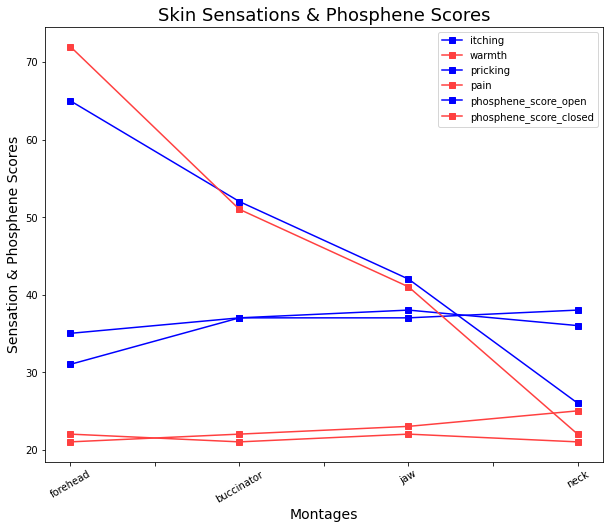

In [48]:
# plot sensations vs. montage (sum)

mont_sens_df.iloc[:,0:6].plot(marker = "s", rot = 30, figsize = (10, 8));
plt.legend(loc = "upper right");
plt.xlabel('Montages',fontsize=14)
plt.ylabel('Sensation & Phosphene Scores', fontsize=14)
plt.title('Skin Sensations & Phosphene Scores', fontsize=18)


#plt.savefig('allsensations.pdf')
#plt.savefig('allsensations.jpg')

# COOL! in this plot we can see that sensations are not that different, but the phosphene clearly changes with montages

Text(0.5, 1.0, 'Mean Skin Sensations & Phosphene Scores')

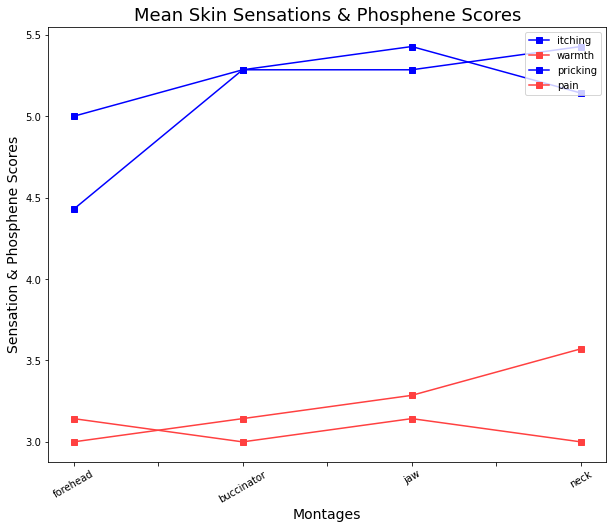

In [49]:
# plot sensations vs. montage (mean)

mont_sens_df_2.iloc[:,0:4].plot(marker = "s", rot = 30, figsize = (10, 8));
plt.legend(loc = "upper right");
plt.xlabel('Montages',fontsize=14)
plt.ylabel('Sensation & Phosphene Scores', fontsize=14)
plt.title('Mean Skin Sensations & Phosphene Scores', fontsize=18)


#plt.savefig('allsensations.pdf')
#plt.savefig('20210909_sensations_ph_mean.jpg')

# COOL! in this plot we can see that sensations are not that different, but the phosphene clearly changes with montages

<Figure size 432x288 with 0 Axes>

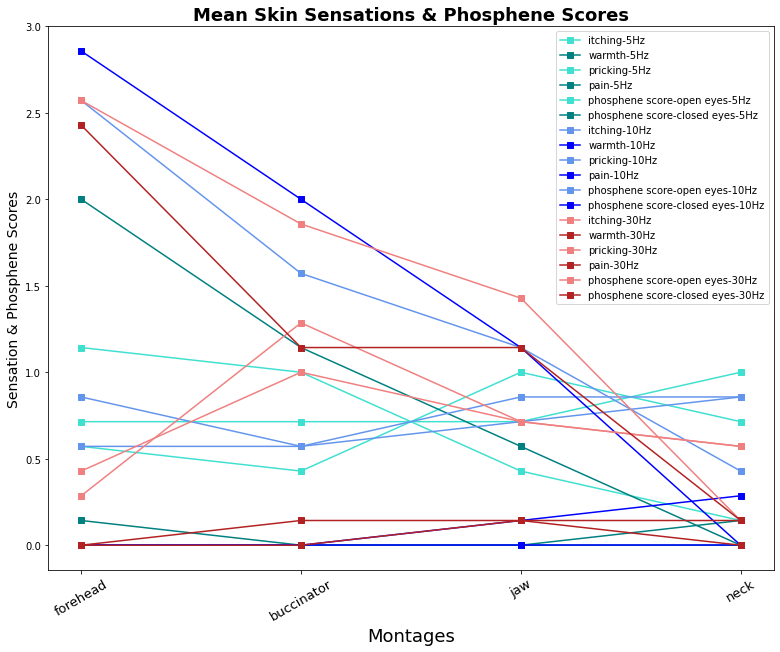

In [50]:

# plot phosphene areas vs. montage (mean)

list_5hz = ['response-111', 'response-211', 'response-311', 'response-411']
list_10hz = ['response-121', 'response-221', 'response-321', 'response-421']
list_30hz = ['response-131', 'response-231', 'response-331', 'response-431']

plt.figure()
ax = summary_table[list_5hz].loc[:5].transpose().plot(marker = "s", color = ['turquoise', 'teal'], rot = 30, figsize = (20, 20));
summary_table[list_10hz].loc[:5].transpose().plot(ax = ax, marker = "s", color = ['cornflowerblue', 'blue'], rot = 30, figsize = (13, 10));
summary_table[list_30hz].loc[:5].transpose().plot(ax = ax, marker = "s", color = ['lightcoral', 'firebrick'], rot = 30, figsize = (13, 10));


my_leg = ['itching-5Hz', 'warmth-5Hz', 'pricking-5Hz', 'pain-5Hz', 'phosphene score-open eyes-5Hz', 'phosphene score-closed eyes-5Hz',
         'itching-10Hz', 'warmth-10Hz', 'pricking-10Hz', 'pain-10Hz', 'phosphene score-open eyes-10Hz', 'phosphene score-closed eyes-10Hz',
         'itching-30Hz', 'warmth-30Hz', 'pricking-30Hz', 'pain-30Hz', 'phosphene score-open eyes-30Hz', 'phosphene score-closed eyes-30Hz']


plt.legend(my_leg,  loc = "upper right", fontsize=10);


#L = plt.legend(loc = "upper right", fontsize=5);
#L.get_texts()[0].set_text('test')


plt.xlabel('Montages',fontsize=18)
plt.ylabel('Sensation & Phosphene Scores', fontsize=14)
plt.title('Mean Skin Sensations & Phosphene Scores', fontsize=18, weight='bold')
plt.xticks(range(4), np.array(montages), fontsize=13)



#plt.savefig('phospheneareas.pdf')
#plt.savefig('20210909_phospheneareas_final.jpg')

plt.show()



<Figure size 432x288 with 0 Axes>

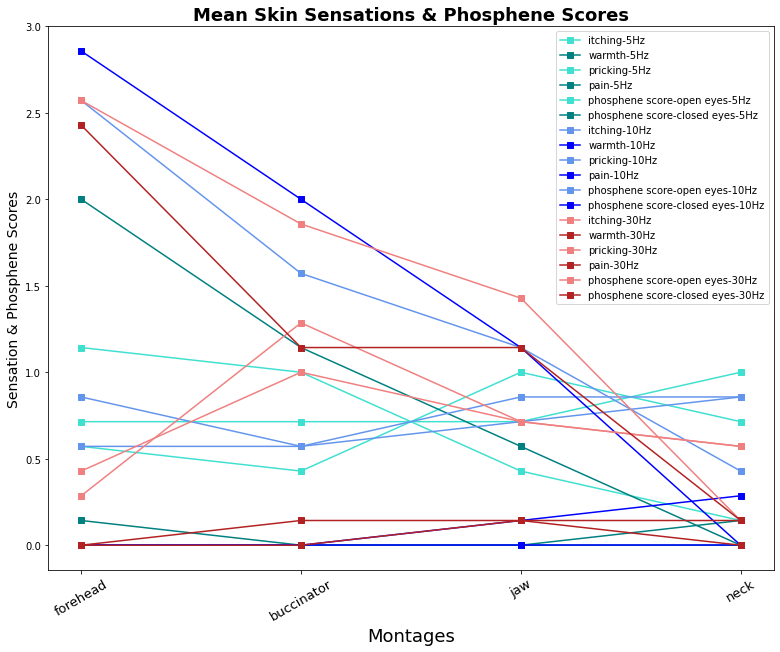

In [51]:

#regression = sm.ols(y=summary_table[list_5hz].loc[:5].transpose().head(), x=summary_table[list_5hz].loc[:5].transpose().index.name)

plt.figure()
ax = summary_table[list_5hz].loc[:5].transpose().plot(marker = "s", color = ['turquoise', 'teal'], rot = 30, figsize = (20, 20));
summary_table[list_10hz].loc[:5].transpose().plot(ax = ax, marker = "s", color = ['cornflowerblue', 'blue'], rot = 30, figsize = (13, 10));
summary_table[list_30hz].loc[:5].transpose().plot(ax = ax, marker = "s", color = ['lightcoral', 'firebrick'], rot = 30, figsize = (13, 10));

#bandwidth = (max(summary_table.loc[:5].transpose())-min(summary_table.loc[:5].transpose()))/2

my_leg = ['itching-5Hz', 'warmth-5Hz', 'pricking-5Hz', 'pain-5Hz', 'phosphene score-open eyes-5Hz', 'phosphene score-closed eyes-5Hz',
         'itching-10Hz', 'warmth-10Hz', 'pricking-10Hz', 'pain-10Hz', 'phosphene score-open eyes-10Hz', 'phosphene score-closed eyes-10Hz',
         'itching-30Hz', 'warmth-30Hz', 'pricking-30Hz', 'pain-30Hz', 'phosphene score-open eyes-30Hz', 'phosphene score-closed eyes-30Hz']

#plt.fill_between(summary_table[list_5hz].loc[:5].transpose().head(),summary_table[list_5hz].loc[:5].transpose().index.name,  where= summary_table[list_5hz].loc[:5].transpose(), facecolor='green', alpha=0.2, interpolate=True)

plt.legend(my_leg,  loc = "upper right", fontsize=10);


#L = plt.legend(loc = "upper right", fontsize=5);
#L.get_texts()[0].set_text('test')


plt.xlabel('Montages',fontsize=18)
plt.ylabel('Sensation & Phosphene Scores', fontsize=14)
plt.title('Mean Skin Sensations & Phosphene Scores', fontsize=18, weight='bold')
plt.xticks(range(4), np.array(montages), fontsize=13)



#plt.savefig('phospheneareas.pdf')
#plt.savefig('20210909_phospheneareas_final.jpg')

plt.show()

with pd.ExcelWriter('new_plot.xlsx') as writer:  

    summary_table[list_5hz].loc[:5].transpose().to_excel(writer, sheet_name='5Hz')
    summary_table[list_10hz].loc[:5].transpose().to_excel(writer, sheet_name='10Hz')
    summary_table[list_30hz].loc[:5].transpose().to_excel(writer, sheet_name='30Hz')



<Figure size 432x288 with 0 Axes>

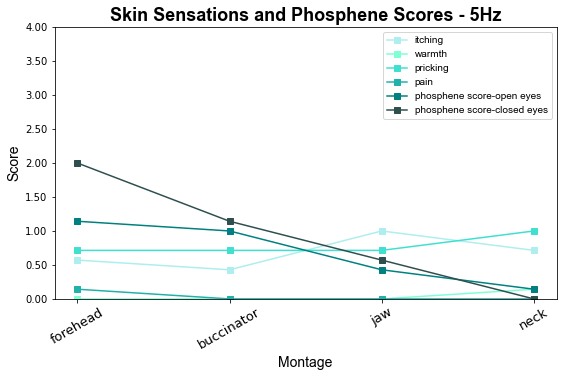

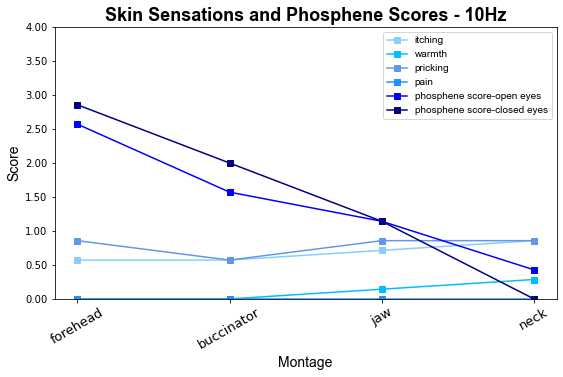

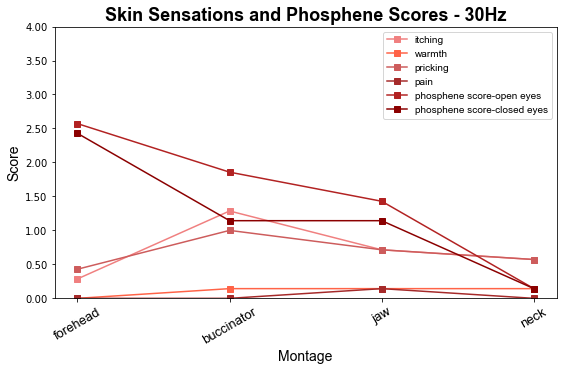

In [52]:

# plot phosphene areas vs. montage (mean)

list_5hz = ['response-111', 'response-211', 'response-311', 'response-411']
list_10hz = ['response-121', 'response-221', 'response-321', 'response-421']
list_30hz = ['response-131', 'response-231', 'response-331', 'response-431']

fig= plt.figure(1)
#fig, ax = plt.subplots(1, 3, figsize = (18, 5))

my_leg = ['itching-5Hz', 'warmth-5Hz', 'pricking-5Hz', 'pain-5Hz', 'phosphene score-open eyes-5Hz', 'phosphene score-closed eyes-5Hz',
         'itching-10Hz', 'warmth-10Hz', 'pricking-10Hz', 'pain-10Hz', 'phosphene score-open eyes-10Hz', 'phosphene score-closed eyes-10Hz',
         'itching-30Hz', 'warmth-30Hz', 'pricking-30Hz', 'pain-30Hz', 'phosphene score-open eyes-30Hz', 'phosphene score-closed eyes-30Hz']

my_leg_2 = ['itching', 'warmth', 'pricking', 'pain', 'phosphene score-open eyes', 'phosphene score-closed eyes']

#ax = fig.add_subplot(131)
summary_table[list_5hz].loc[:5].transpose().plot(marker = "s", 
                                                 color = ['paleturquoise','aquamarine', 'turquoise', 'lightseagreen','teal', 'darkslategray'], 
                                                 ylim=(0,4.00), rot = 30, figsize = (9,5));
plt.xticks(range(4), np.array(montages), fontsize=13)
plt.xlabel('Montage', font="Arial", fontsize=14)
plt.ylabel('Score', font="Arial", fontsize=14)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.legend(my_leg_2,  loc = "upper right", prop={'family': 'Arial'}, fontsize=10);
plt.title('Skin Sensations and Phosphene Scores - 5Hz', font="Arial", fontsize=18, weight='bold')
#plt.savefig('20211104_sense_ph_5Hz.jpg', bbox_inches='tight')
#plt.savefig('20211104_sense_ph_5Hz.eps', bbox_inches='tight', format='eps')
#plt.savefig('20211104_sense_ph_5Hz.svg', bbox_inches='tight', format='svg')

#fig.add_subplot(132)
summary_table[list_10hz].loc[:5].transpose().plot( marker = "s", 
                                                  color = ['lightskyblue','deepskyblue','cornflowerblue', 'dodgerblue','blue', 'navy'], 
                                                  ylim=(0,4.00), rot = 30, figsize = (9,5));
plt.xticks(range(4), np.array(montages), fontsize=13)
plt.xlabel('Montage', font="Arial", fontsize=14)
plt.ylabel('Score', font="Arial", fontsize=14)
plt.legend(my_leg_2,  loc = "upper right", prop={'family': 'Arial'}, fontsize=10);
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.title('Skin Sensations and Phosphene Scores - 10Hz',font="Arial", fontsize=18, weight='bold')
#plt.savefig('20211104_sense_ph_10Hz.jpg', bbox_inches='tight')
#plt.savefig('20211104_sense_ph_10Hz.eps', bbox_inches='tight', format='eps')
#plt.savefig('20211104_sense_ph_10Hz.svg', bbox_inches='tight', format='svg')



#fig.add_subplot(133)
summary_table[list_30hz].loc[:5].transpose().plot( marker = "s", 
                                                  color = ['lightcoral','tomato','indianred','brown', 'firebrick','darkred'], 
                                                  ylim=(0,4.00), rot = 30, figsize = (9,5));
plt.xticks(range(4), np.array(montages), font="Arial", fontsize=13)
plt.xlabel('Montage', font="Arial", fontsize=14)
plt.ylabel('Score', font="Arial", fontsize=14)
plt.legend(my_leg_2,  loc = "upper right", prop={'family': 'Arial'}, fontsize=10);
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.title('Skin Sensations and Phosphene Scores - 30Hz', font="Arial", fontsize=18, weight='bold')
#plt.savefig('20211104_sense_ph_30Hz.jpg', bbox_inches='tight')
#plt.savefig('20211104_sense_ph_30Hz.eps', bbox_inches='tight', format='eps')
#plt.savefig('20211104_sense_ph_30Hz.svg', bbox_inches='tight', format='svg')



#ax[0].set_xlabel('Montages',fontsize=18)
#ax[1].set_xlabel('Montages',fontsize=18)
#ax[2].set_xlabel('Montages',fontsize=18)

#ax[0].set_ylabel('Sensation & Phosphene Scores', fontsize=14)
#plt.suptitle('Mean Skin Sensations & Phosphene Scores', fontsize=18, weight='bold')


ind = np.arange(len(montages))
#ax[0].set_xticks(['1','2','3','4'])
#ax[1].set_xticks(range(4), np.array(montages))
#ax[2].set_xticks(range(4), np.array(montages))

#ax[2].set_xticks(range(4), np.array(montages), fontsize=13)

#plt.setp(ax.xaxis.get_majorticklabels(), rotation=40)

#for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
#    tick.set_fontsize(12) 


#plt.savefig('phospheneareas.pdf')

plt.show()



<Figure size 432x288 with 0 Axes>

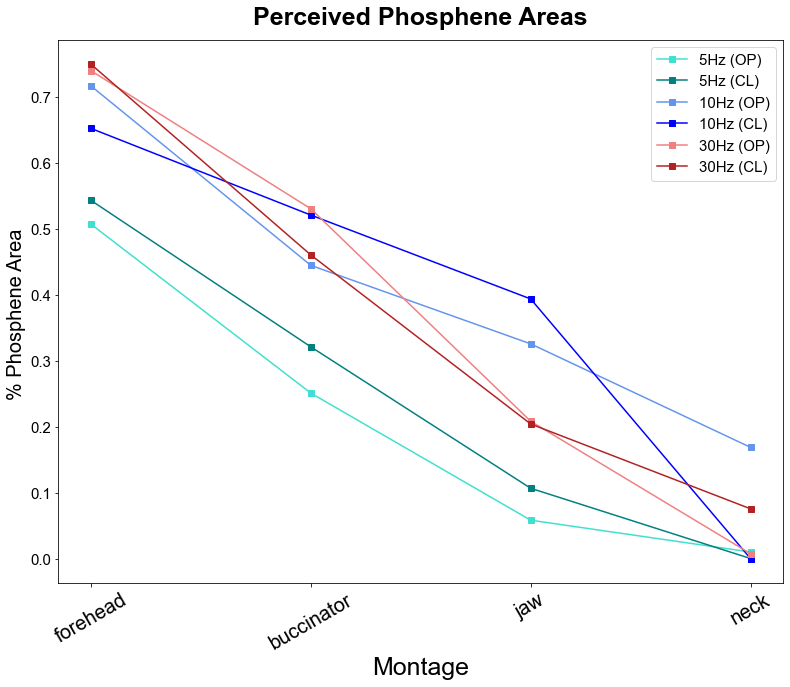

In [53]:

# plot phosphene areas vs. montage (mean)

list_5hz = ['response-111', 'response-211', 'response-311', 'response-411']
list_10hz = ['response-121', 'response-221', 'response-321', 'response-421']
list_30hz = ['response-131', 'response-231', 'response-331', 'response-431']

summary_table[list_30hz] = summary_table[list_30hz].replace(summary_table[list_30hz].iloc[7,0],0.75)

plt.figure()
ax = summary_table[list_5hz].loc[6:7].transpose().plot(marker = "s", color = ['turquoise', 'teal'], rot = 30, figsize = (13, 10));
summary_table[list_10hz].loc[6:7].transpose().plot(ax = ax, marker = "s", color = ['cornflowerblue', 'blue'], rot = 30, figsize = (13, 10));
summary_table[list_30hz].loc[6:7].transpose().plot(ax = ax, marker = "s", color = ['lightcoral', 'firebrick'], rot = 30, figsize = (13, 10));

plt.legend(['5Hz (OP)', '5Hz (CL)', 
            '10Hz (OP)', '10Hz (CL)', 
           '30Hz (OP)', '30Hz (CL)'], loc = "upper right", prop={'family': 'Arial', 'size':15}, fontsize=50);

plt.xlabel('Montage', font="Arial", fontsize=25)
plt.ylabel('% Phosphene Area ', font="Arial", fontsize=20)
plt.title('Perceived Phosphene Areas', font="Arial", fontsize=25, weight='bold', pad = 15)
plt.xticks(range(4), np.array(montages), font="Arial", fontsize=20)
plt.yticks(font="Arial", fontsize=15)



#plt.savefig('phospheneareas.pdf')
plt.savefig('temp_new_area.png', bbox_inches='tight')


#plt.savefig('20211104_phospheneareas_final.eps', format='eps')
#plt.savefig('20211104_phospheneareas_final.svg', format='svg')

plt.show()



In [54]:
summary_table[list_30hz] = summary_table[list_30hz].replace(summary_table[list_30hz].iloc[7,0],0.75)
summary_table[list_30hz]

,response-131,response-231,response-331,response-431
0,0.29,1.29,0.71,0.57
1,0.00,0.14,0.14,0.14
2,0.43,1.00,0.71,0.57
3,0.00,0.00,0.14,0.00
4,2.57,1.86,1.43,0.14
5,2.43,1.14,1.14,0.14
6,0.74,0.53,0.21,0.01
7,0.75,0.46,0.20,0.08


In [55]:
summary_table

,code,question,response-111,unpleasant-111,response-112,unpleasant-112,response-121,unpleasant-121,response-131,unpleasant-131,...,jaw,response-411,unpleasant-411,response-412,unpleasant-412,response-421,unpleasant-421,response-431,unpleasant-431,neck
0,A-1,itching,0.57,0.14,1.14,0.00,0.57,0.00,0.29,0.00,...,5.43,0.71,0.00,1.00,0.00,0.86,0.14,0.57,0.00,5.14
1,A-2,warmth,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,3.29,0.14,0.14,1.00,0.00,0.29,0.00,0.14,0.00,3.57
2,A-3,pricking,0.71,0.00,1.00,0.00,0.86,0.14,0.43,0.00,...,5.29,1.00,0.29,1.00,0.00,0.86,0.00,0.57,0.14,5.43
3,A-4,pain,0.14,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,3.14,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,3.00
4,B-1,phosphene_score_open,1.14,0.00,1.00,0.00,2.57,0.00,2.57,0.00,...,6.00,0.14,0.00,1.00,0.00,0.43,0.00,0.14,0.00,3.71
5,B-2,phosphene_score_closed,2.00,0.00,1.00,0.00,2.86,0.00,2.43,0.00,...,5.86,0.00,0.00,1.00,0.00,0.00,0.00,0.14,0.00,3.14
6,B-3,phosphene_area_open,0.51,NaN,0.00,NaN,0.72,NaN,0.74,NaN,...,0.59,0.01,NaN,0.00,NaN,0.17,NaN,0.01,NaN,0.19
7,B-4,phosphene_area_closed,0.54,NaN,0.00,NaN,0.65,NaN,0.75,NaN,...,0.70,0.00,NaN,0.00,NaN,0.00,NaN,0.08,NaN,0.08


In [56]:
anova_2_raw = pd.read_excel('ANOVA_raw.xlsx')
anova_2_raw

,freq,forehead,buccinator,jaw,neck
0,5Hz,0.13,0.04,0.00,0.00
1,5Hz,0.32,0.08,0.00,0.00
2,5Hz,0.76,0.18,0.00,0.00
3,5Hz,0.26,0.70,0.00,0.00
4,5Hz,0.42,0.17,0.00,0.00
5,5Hz,1.00,0.50,0.33,0.00
6,5Hz,0.66,0.08,0.08,0.07
7,10Hz,1.00,0.15,0.03,0.00
8,10Hz,0.20,0.19,0.12,0.00
9,10Hz,0.74,0.38,0.21,0.00
